In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os.path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import time
import joblib
from sklearn.model_selection import cross_val_score

import get_metrics
import lazypredict
from lazypredict.Supervised import LazyClassifier

import sklearn
import xgboost
import lightgbm

from collections import defaultdict
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from random import shuffle
from sklearn.metrics import classification_report, confusion_matrix
# deprecated in version 1.0 and removed in 1.2 
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

In [3]:
srr_names = ['ERR1831349',
             'ERR1831346',
             'ERR1831347',
             'ERR1831348',
             'ERR1831350',
             'ERR1831351',
             'ERR1831352',
             'ERR1831353',
             'ERR1905889',
             'ERR1905890',
             'SRR14724463',
             'SRR14724473',
             'SRR14724483',
             'SRR14724493', 
             'SRR14724503',
             'SRR14724513',
             'SRR2106342',
             'SRR2106344',
             'DRR189730',
             'DRR189731',
             'DRR189732']

In [4]:
#df = pd.read_pickle('ML_df.pkl')
df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
#df = pd.read_pickle('ML_df_add_LR_feats.pkl')

X = df.drop(["IS_ARTIFACT"], axis=1) # drop labels
y = df["IS_ARTIFACT"].copy() # labels

In [5]:
cat_attribs = ['REF','ALT'] 
X_train_num = X.drop(cat_attribs, axis=1) 
num_attribs = list(X_train_num)

In [6]:
all_features = num_attribs + cat_attribs

In [7]:
len(all_features)

274

In [ ]:
with open('predictive_power_joined_LR_feats.pkl', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    # Keeps object type during pickling
    features_and_scores = pickle.load(f) 

In [ ]:
# Calculates accuracy score of each feature

#all_features = num_attribs + cat_attribs
output = []
for feature in all_features:
    
    total_score = 0
    num_scores = 0
    for features, score in features_and_scores:
        if feature in features:
            total_score += score
            num_scores += 1
            
    if num_scores > 1: # yvonna did > prob to not bias features with only 1 model score
        avg_score = total_score / num_scores
        output.append((avg_score, feature, num_scores))
        
output.sort(reverse = True)
for score, feature, num_scores in output:
    print("{:.3f}:\t{:10}\t{} models".format(score, feature, num_scores))

print()
feature_order = [feature for (score, feature, _) in output]
print(feature_order)
print()

0.977:	AF        	114 models
0.977:	HIAF      	114 models
0.972:	HICNT     	117 models
0.971:	VD        	118 models
0.971:	SN        	105 models
0.886:	ADJAF     	98 models
0.675:	TTAA      	120 models
0.658:	TTTA      	119 models
0.654:	AAAA      	102 models
0.651:	TAAA      	112 models
0.649:	TATT      	122 models
0.648:	TTAT      	97 models
0.643:	ATAA      	124 models
0.643:	TATA      	112 models
0.640:	AAAT      	103 models
0.631:	TAAC      	115 models
0.631:	TTTT      	115 models
0.628:	AATA      	99 models
0.626:	ATTT      	106 models
0.626:	TAAT      	118 models
0.624:	REF       	116 models
0.622:	ATTA      	117 models
0.617:	ALT       	113 models
0.617:	TTTC      	113 models
0.616:	TTAG      	110 models
0.613:	HOMO_POLY_T	120 models
0.608:	AATT      	112 models
0.607:	GAAA      	114 models
0.606:	CCCC      	104 models
0.604:	TTAC      	99 models
0.603:	GGGG      	84 models
0.602:	AGGG      	115 models
0.602:	HOMO_POLY_A	124 models
0.599:	TCCC      	114 models
0.594:	GGGT      

# Predictive Power (after finding feature importance)

In [ ]:
# Removes one feature sequentially and evaluates model accuracy

# predictive_power2.py

In [ ]:
output[:7]

[(0.9767777071635607, 'AF', 114),
 (0.9767255140469635, 'HIAF', 114),
 (0.9720100207222953, 'HICNT', 117),
 (0.9711714964767196, 'VD', 118),
 (0.9706657709218925, 'SN', 105),
 (0.8859719977695982, 'ADJAF', 98),
 (0.674516054701179, 'TTAA', 120)]

In [ ]:
avg_accuracy = [score for score, feature, num_scores in output]
feat = [feature for score, feature, num_scores in output]

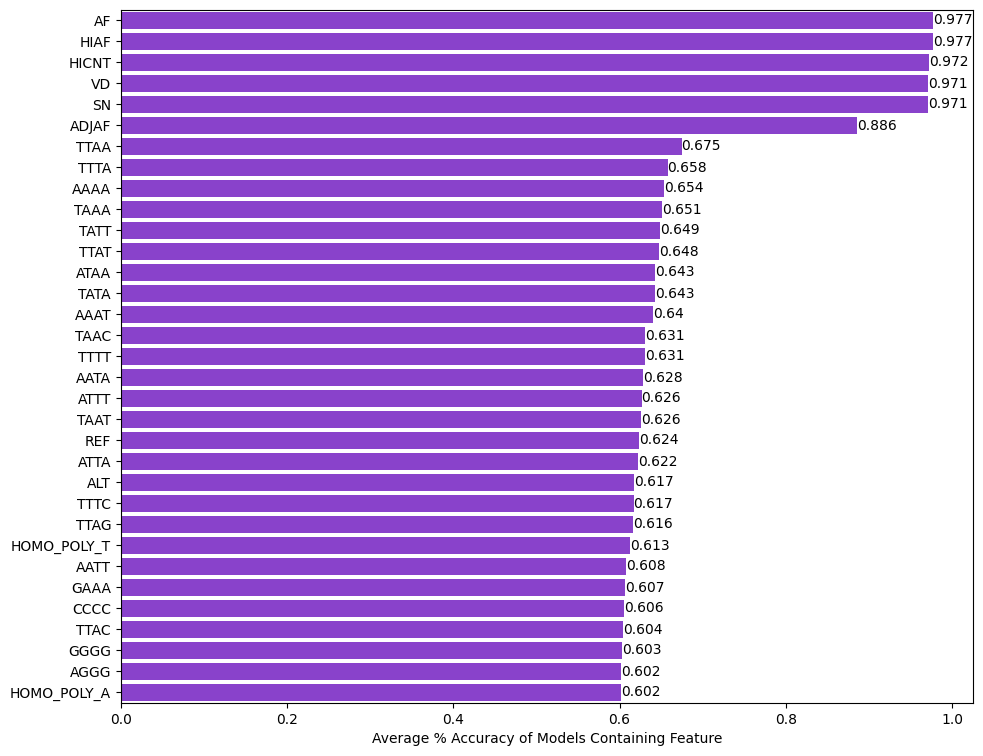

In [ ]:
# Defining the plot size
fig, ax = plt.subplots(figsize=(11, 9))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x=avg_accuracy[:33], y=feat[:33], color='blueviolet')
 
labels = [round(acc, 3) for acc in avg_accuracy[:33]]  
ax.bar_label(ax.containers[0], labels=labels, label_type='edge', size=10)
#ax.bar_label(ax.containers[0], labels=labels, label_type='edge', size=13)    
    
# Setting the label for x-axis
plt.xlabel("Average % Accuracy of Models Containing Feature", size=10)
 
# Setting the label for y-axis
#plt.ylabel("Average % Accuracy of Models Containing Feature", size=10)
 
# Setting the title for the graph
#plt.title("Average % Accuracy of Models Containing Feature")
 
# Finally showing the plot
#plt.show()
plt.savefig('feature_importance.png', bbox_inches='tight')

# Train Test ML models
# Performance evaluation of Machine Learning Models

In [18]:
def preprocess_dataframe(df):
    # Numerical and categorical features are placed in the pipeline here
    
    # Build pipeline
    num_pipeline =  Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # fill in missing values with median values
        ('std_scaler', StandardScaler()),              # feature scaling
        ])
    
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ])

    # df_transformed is the full feature set. Now ready to use.
    #fitted = full_pipeline.fit(df)
    #df_transformed = fitted.transform(df)
    
    X = df.drop(["IS_ARTIFACT"], axis=1) # drop labels
    y = df["IS_ARTIFACT"].copy() # labels
    
    df_transformed = full_pipeline.fit_transform(X)

    # The arrays passed to models.
    X = df_transformed
    #y = df.IS_ARTIFACT
    assert(X.shape[0] == y.shape[0])
    
    # Later do `full_pipeline.transform(test_only_df)
    
    # Train, test, and split the data ### MOVE THIS TO BEFORE CROSS VALIDATION ###
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test #X, y


# Perform cross-validation and builds confusion matrices
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    """Cross-validates, trains, and gets training accuracy for the given model."""

    # Cross-validate (k-fold cross validation)
    print("3-fold Cross-Validation...")
    scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=3)
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

    # Train, test, and split the data ### MOVE THIS TO BEFORE CROSS VALIDATION ###
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Display confusion Matrix (Validation)
    print("Validating using train/test split")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    labels = ['NON_ARTIFACT', 'IS_ARTIFACT']
    cm = confusion_matrix(y_test, y_pred)
    sum_of_rows = cm.sum(axis=1)
    normalized_cm = cm / sum_of_rows[:, np.newaxis]

    df_cm = pd.DataFrame(normalized_cm, index = ['False', 'True'],
                      columns = ['False', 'True'])
    plt.figure(figsize = (2,2))
    ax=plt.subplot()
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, ax=ax, cmap='Blues')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('Actual labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['False', 'True'])
    ax.yaxis.set_ticklabels(['False', 'True'])
    plt.show() # savefig instead

    true_positives = cm[1, 1]
    predicted_positives = cm[1,1] + cm[0, 1]
    actual_positives = cm[1,0] + cm[1, 1]
    print("Test Metrics")
    print("Precision:", true_positives / predicted_positives)
    print("Recall:", true_positives / actual_positives)
    print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
    
def learn_curve(model, X_train, X_test, y_train, y_test):    
    ################
    #np.linspace(0.1, 1.0, 10) means 10% to 100% of data split in 10 ways so we get 10 points in plot
    #use random_state since setting shuffle=True for reproducibility
    train_size, train_scores, test_scores = learning_curve(model, X_train, y_train, scoring="accuracy", cv=3, 
                                                             train_sizes=np.linspace(0.1, 1.0, 5), 
                                                             shuffle=True, random_state=42)
    
    # Converting the accuracy score to misclassification rate
    # accuracy and error rate are complements of each other
    # Accuracy = 1 – Error Rate ; Error Rate = 1 – Accuracy
    train_scores = 1-np.mean(train_scores,axis=1) 
    test_scores = 1-np.mean(test_scores,axis=1) 
    
    lc = pd.DataFrame({"Training_size":train_size,
                       "Training_loss":train_scores,
                       "Validation_loss":test_scores}).melt(id_vars="Training_size")
    
    
    return {"learning_curve":lc}
    ###################
    
    
def learn_curve2(model, X_train, X_test, y_train, y_test):    
    ################
    #np.linspace(0.1, 1.0, 10) means 10% to 100% of data split in 10 ways so we get 10 points in plot
    #use random_state since setting shuffle=True for reproducibility
    
    # types of scoring to use https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    # accuracy, f1, precision, recall, roc_auc, neg_log_loss
    
    #train_size, train_scores, test_scores = learning_curve(model, X_train, y_train, scoring="accuracy", cv=3,
    #                                                       train_sizes=np.linspace(0.1, 1.0, 10),
    #                                                       shuffle=True, random_state=42) #no score_name, n_jobs, score_type
    
    
    #common_params = {
    #"X": X_train,
    #"y": y_train,
    #"train_sizes": np.linspace(0.1, 1.0, 10),
    #"cv": 3, #ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    #"score_type": "both",
    #"n_jobs": 4,
    #"score_name": "Accuracy",
    #"shuffle": True,
    #"random_state": 42} #no model, scoring
    
    display = LearningCurveDisplay.from_estimator(model, X_train, y_train, scoring="accuracy", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 10),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Accuracy")
        

    
    
    #display = LearningCurveDisplay(train_sizes=train_size, 
    #                               train_scores=train_scores, 
    #                               test_scores=test_scores, 
    #                               score_name="Accuracy")
    
    return display
    
    
    
    # Converting the accuracy score to misclassification rate
    # accuracy and error rate are complements of each other
    # Accuracy = 1 – Error Rate ; Error Rate = 1 – Accuracy
    #train_scores = 1-np.mean(train_scores,axis=1) 
    #test_scores = 1-np.mean(test_scores,axis=1) 
    
    # might have to get mean of score??
    
    #lc = pd.DataFrame({"Training_size":train_size,
    #                   "Training_loss":train_scores,
    #                   "Validation_loss":test_scores}).melt(id_vars="Training_size")
    
    
    #return {"learning_curve":lc}
    ###################

3-fold Cross-Validation...
Scores: [0.97495206 0.97443682 0.97555715]
Mean: 0.9749820093101587
Standard deviation: 0.0004578634125481545
Validating using train/test split


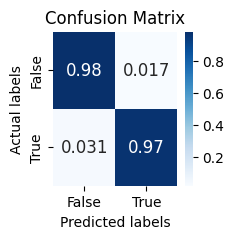

Precision: 0.9927205370521125
Recall: 0.9694411693543742


In [15]:
# Extra Trees Classifier
def build_et_classifier():
    return ExtraTreesClassifier(
        n_estimators=100,
        max_depth=7, #3
        random_state=42,
        n_jobs=16,
        class_weight='balanced'
    )

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the Extra Trees model
et_cls = build_et_classifier()
X_train, X_test, y_train, y_test = preprocess_dataframe(df)
train_and_evaluate_model(et_cls, X_train, X_test, y_train, y_test)

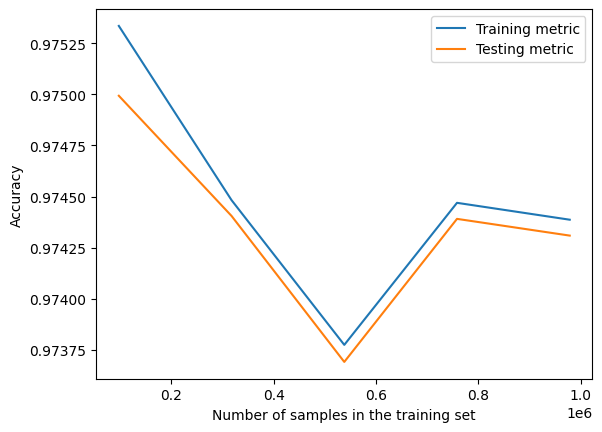

In [37]:
# types of scoring to use https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# accuracy, f1, precision, recall, roc_auc, neg_log_loss

# Accuracy learning curve was just the opposite of misclassification rate
acc_lc = LearningCurveDisplay.from_estimator(et_cls, X_train, y_train, scoring="accuracy", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Accuracy", std_display_style=None)

plt.show()

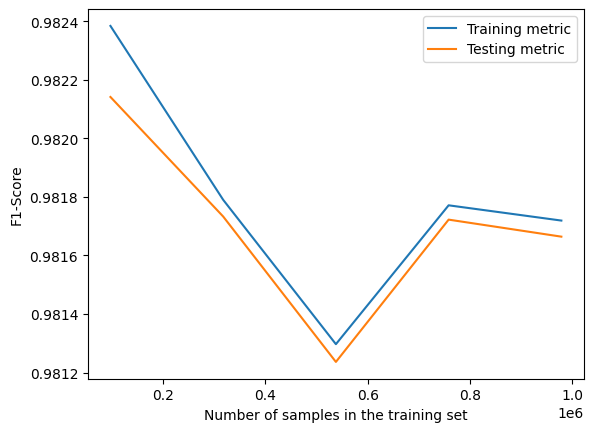

In [35]:
# F1 learning curve

f1_lc = LearningCurveDisplay.from_estimator(et_cls, X_train, y_train, scoring="f1", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="F1-Score", std_display_style=None)

plt.show()

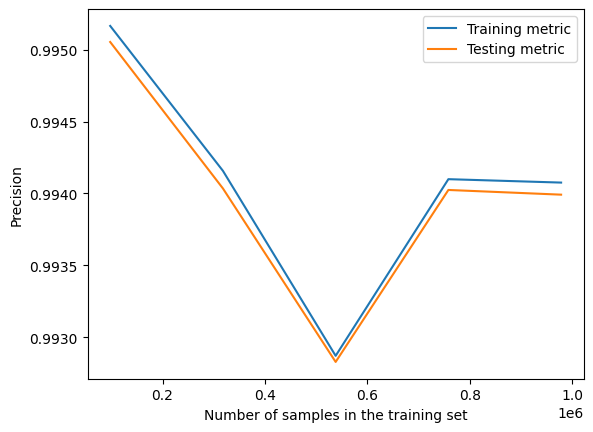

In [36]:
# Precision learning curve

prec_lc = LearningCurveDisplay.from_estimator(et_cls, X_train, y_train, scoring="precision", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Precision", std_display_style=None)

plt.show()

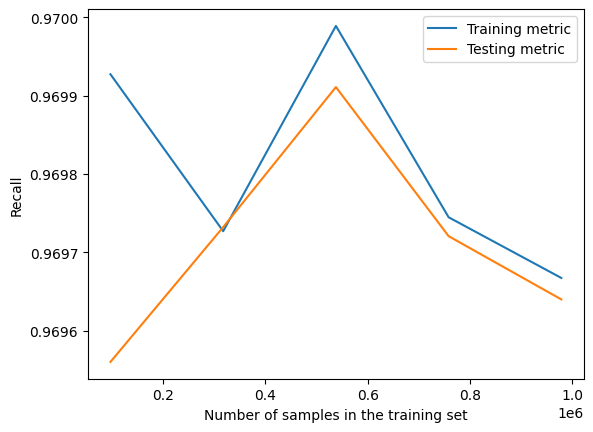

In [38]:
# Recall learning curve

rec_lc = LearningCurveDisplay.from_estimator(et_cls, X_train, y_train, scoring="recall", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Recall", std_display_style=None)

plt.show()

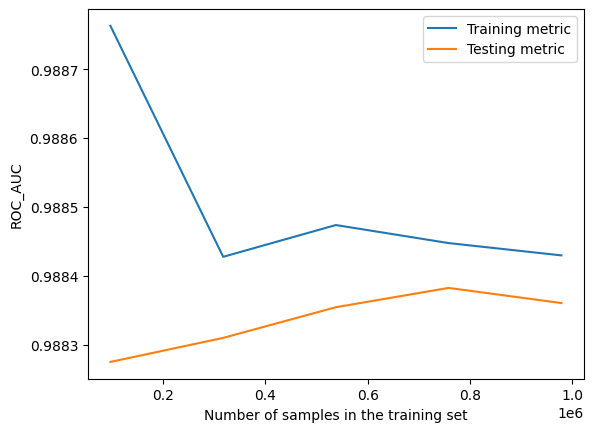

In [33]:
# ROC AUC learning curve

roc_lc = LearningCurveDisplay.from_estimator(et_cls, X_train, y_train, scoring="roc_auc", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="ROC_AUC", std_display_style=None)

plt.show()

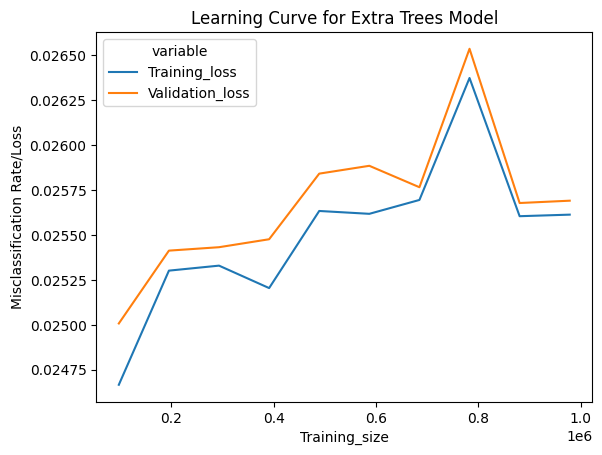

In [14]:
lc = learn_curve(et_cls, X_train, X_test, y_train, y_test)
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve for Extra Trees Model")
plt.ylabel("Misclassification Rate/Loss");

3-fold Cross-Validation...
Scores: [0.97699646 0.97715383 0.9772908 ]
Mean: 0.9771470278192075
Standard deviation: 0.00012026263428397362
Validating using train/test split


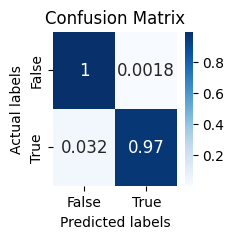

Precision: 0.9992508739803563
Recall: 0.9682083699780708


In [39]:
# Random Forest Classifier
def build_rf_classifier():
    return RandomForestClassifier(
        n_estimators=100,
        max_depth=7, #3
        random_state=42,
        n_jobs=16,
        class_weight='balanced'
    )

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the Random Forest model
rf_cls = build_rf_classifier()
#X_train, X_test, y_train, y_test = preprocess_dataframe(df)
train_and_evaluate_model(rf_cls, X_train, X_test, y_train, y_test)

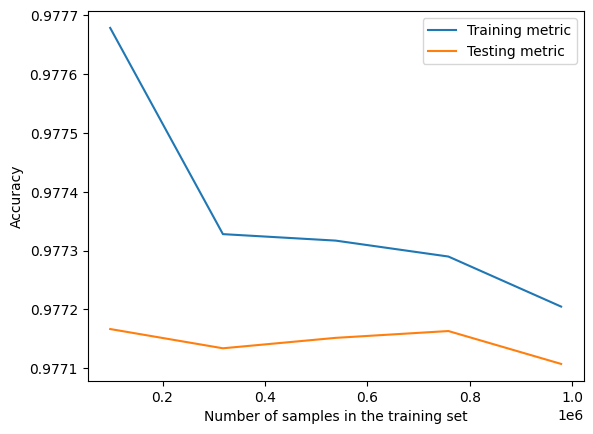

In [40]:
# types of scoring to use https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# accuracy, f1, precision, recall, roc_auc, neg_log_loss

# Accuracy learning curve was just the opposite of misclassification rate
acc_lc = LearningCurveDisplay.from_estimator(rf_cls, X_train, y_train, scoring="accuracy", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Accuracy", std_display_style=None)

plt.show()

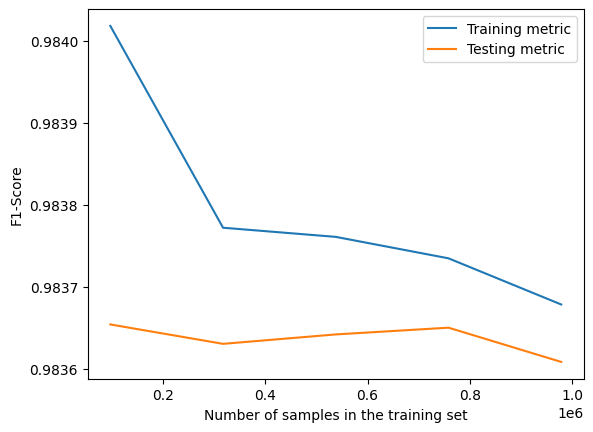

In [41]:
# F1 learning curve

f1_lc = LearningCurveDisplay.from_estimator(rf_cls, X_train, y_train, scoring="f1", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="F1-Score", std_display_style=None)

plt.show()

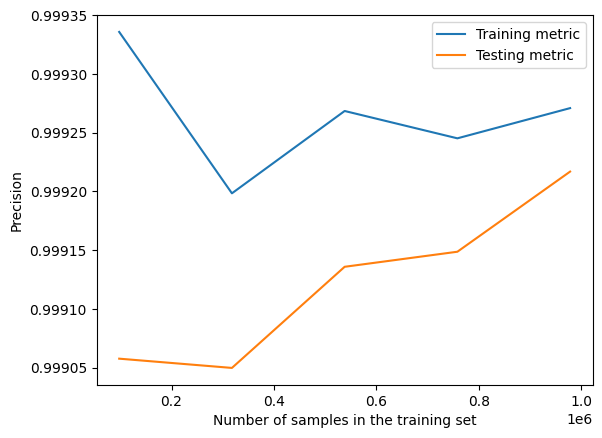

In [42]:
# Precision learning curve

prec_lc = LearningCurveDisplay.from_estimator(rf_cls, X_train, y_train, scoring="precision", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Precision", std_display_style=None)

plt.show()

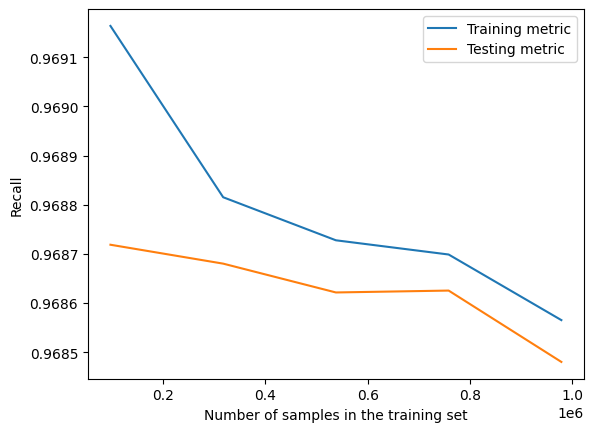

In [43]:
# Recall learning curve

rec_lc = LearningCurveDisplay.from_estimator(rf_cls, X_train, y_train, scoring="recall", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Recall", std_display_style=None)

plt.show()

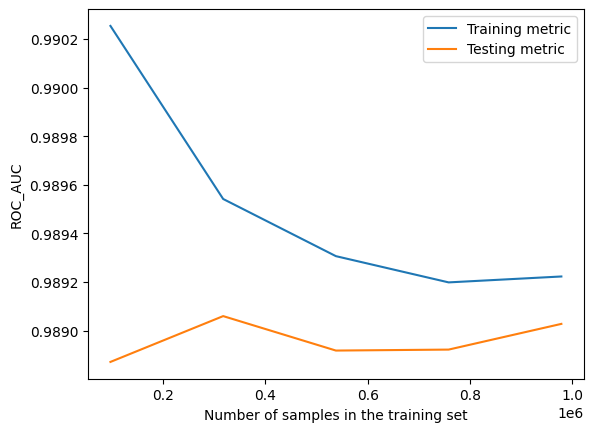

In [44]:
# ROC AUC learning curve

roc_lc = LearningCurveDisplay.from_estimator(rf_cls, X_train, y_train, scoring="roc_auc", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="ROC_AUC", std_display_style=None)

plt.show()

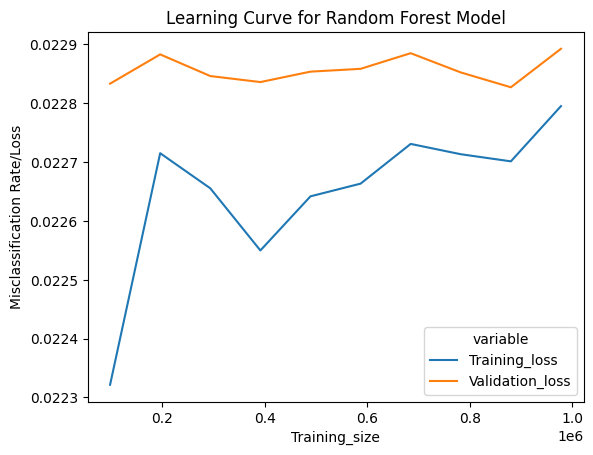

In [16]:
lc = learn_curve(rf_cls, X_train, X_test, y_train, y_test)
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve for Random Forest Model")
plt.ylabel("Misclassification Rate/Loss");

3-fold Cross-Validation...
Scores: [0.97943133 0.97932089 0.97943947]
Mean: 0.9793972294073824
Standard deviation: 5.408140879017063e-05
Validating using train/test split


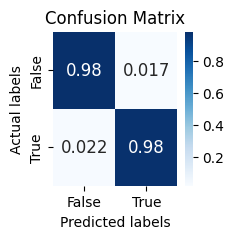

Precision: 0.9927416179720969
Recall: 0.9780554030025002


In [45]:
# XGB Classifier
#('XGBClassifier', xgboost.XGBClassifier)
#('XGBClassifier', xgboost.sklearn.XGBClassifier)

#1834281 variant calls 1301098 artifacts, 533183 non-artifacts

# Artifacts are much more present in the data than non-artifacts

# For imbalanced binary classification dataset, negative class refers to the majority class (artifacts)
# positive class refers to the minority class (non-artifacts)

pos_records = len(y[y==False]) # positive records are minority class (non-artifacts)
neg_records = len(y[y==True]) # negative records are majority class (artifacts)
#scale_pos_weight=sum(negative instances)/sum(positive instances)
spw = neg_records / pos_records

def build_xgb_classifier():
    return xgboost.XGBClassifier(
        n_estimators=100,
        max_depth=7, #3
        random_state=42,
        n_jobs=16,
        scale_pos_weight=spw
    )

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the XGB model
xgb_cls = build_xgb_classifier()
#X_train, X_test, y_train, y_test = preprocess_dataframe(df)
train_and_evaluate_model(xgb_cls, X_train, X_test, y_train, y_test)

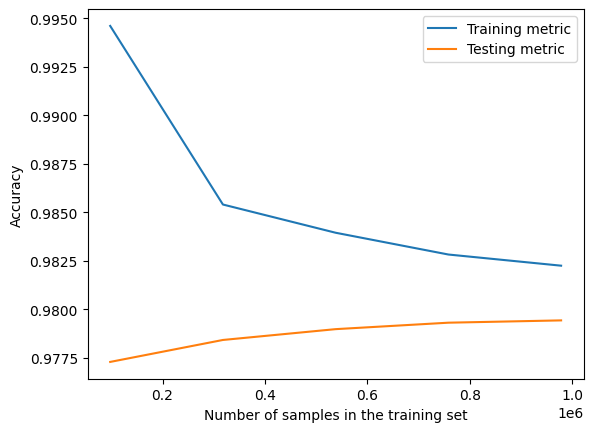

In [46]:
# types of scoring to use https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# accuracy, f1, precision, recall, roc_auc, neg_log_loss

# Accuracy learning curve was just the opposite of misclassification rate
acc_lc = LearningCurveDisplay.from_estimator(xgb_cls, X_train, y_train, scoring="accuracy", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Accuracy", std_display_style=None)

plt.show()

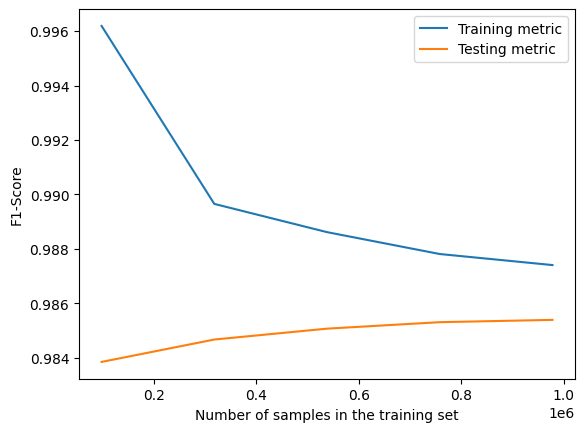

In [47]:
# F1 learning curve

f1_lc = LearningCurveDisplay.from_estimator(xgb_cls, X_train, y_train, scoring="f1", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="F1-Score", std_display_style=None)

plt.show()

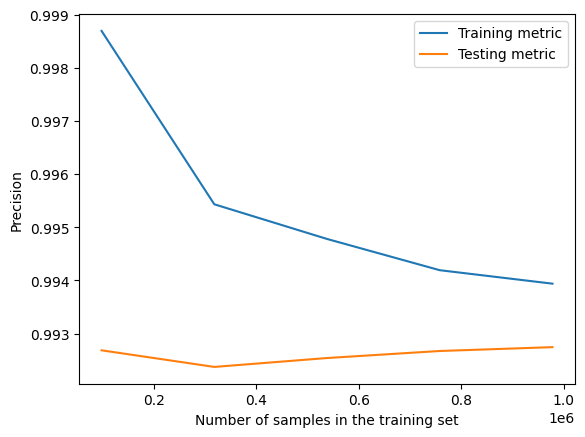

In [48]:
# Precision learning curve

prec_lc = LearningCurveDisplay.from_estimator(xgb_cls, X_train, y_train, scoring="precision", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Precision", std_display_style=None)

plt.show()

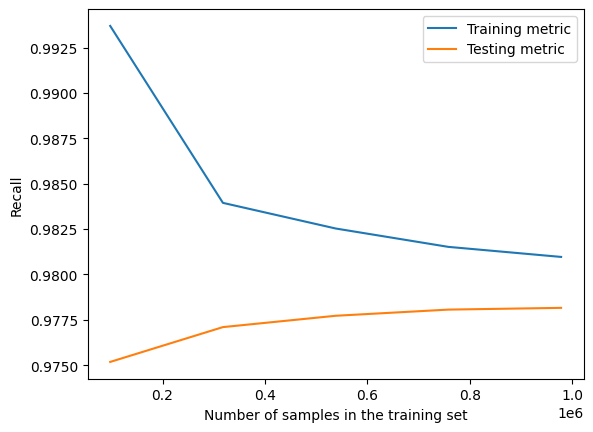

In [49]:
# Recall learning curve

rec_lc = LearningCurveDisplay.from_estimator(xgb_cls, X_train, y_train, scoring="recall", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Recall", std_display_style=None)

plt.show()

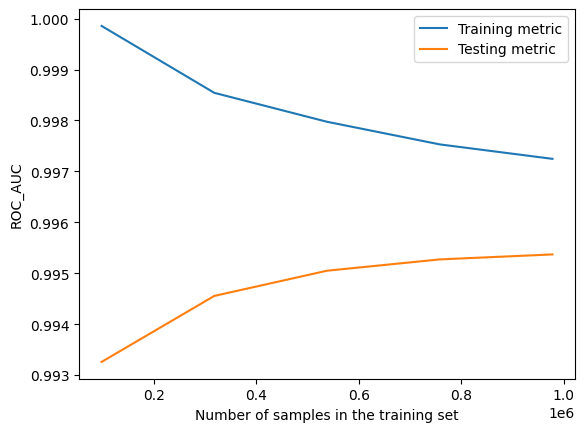

In [50]:
# ROC AUC learning curve

roc_lc = LearningCurveDisplay.from_estimator(xgb_cls, X_train, y_train, scoring="roc_auc", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="ROC_AUC", std_display_style=None)

plt.show()

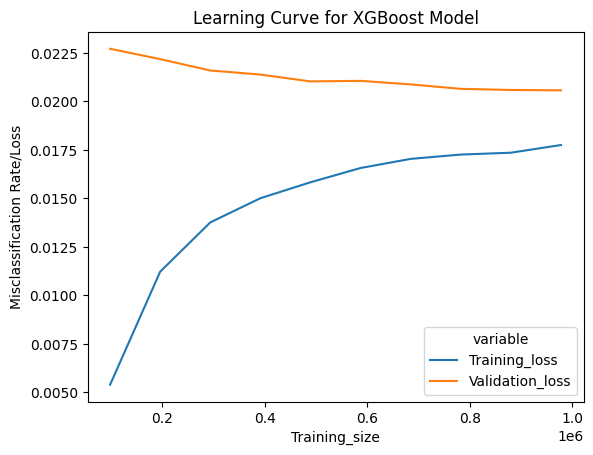

In [18]:
lc = learn_curve(xgb_cls, X_train, X_test, y_train, y_test)
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve for XGBoost Model")
plt.ylabel("Misclassification Rate/Loss");

# UNDERFIT MODEL
# https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5#:~:text=doesn't%20flatten.-,Interpreting%20the%20validation%20loss,model%20performance%20on%20unseen%20data

3-fold Cross-Validation...
Scores: [0.70921123 0.70921268 0.70921268]
Mean: 0.7092121977022092
Standard deviation: 6.834949033483003e-07
Validating using train/test split


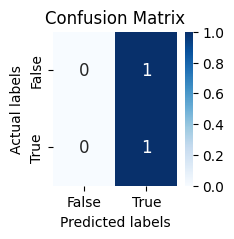

Precision: 0.7097670209373135
Recall: 1.0


In [20]:
# Dummy Classifier
def build_dummy_classifier():
    return DummyClassifier(strategy='prior', 
                           random_state=None, 
                           constant=None)

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the Dummy model
dum_cls = build_dummy_classifier()
#X_train, X_test, y_train, y_test = preprocess_dataframe(df)
train_and_evaluate_model(dum_cls, X_train, X_test, y_train, y_test)

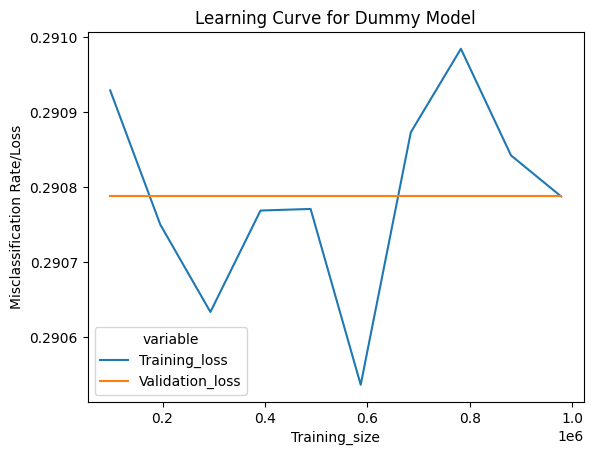

In [23]:
lc = learn_curve(dum_cls, X_train, X_test, y_train, y_test)
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve for Dummy Model")
plt.ylabel("Misclassification Rate/Loss");

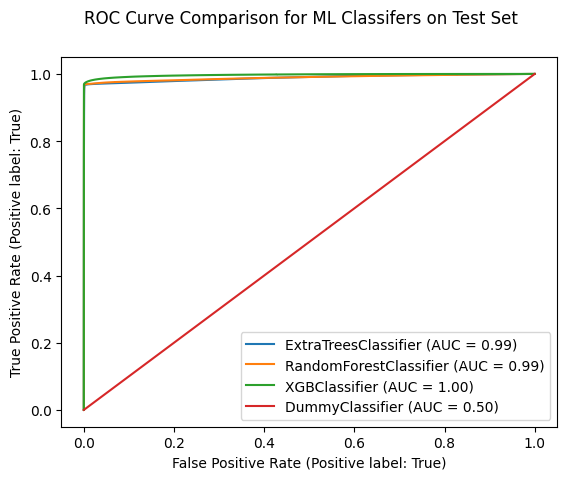

In [24]:
# Plot the test data using ROC curve and calculate AUC Scores

# Create a ROC Curve
#from sklearn import metrics

ETplot = plot_roc_curve(et_cls, X_train, y_train)
RFplot = plot_roc_curve(rf_cls, X_train, y_train, ax=ETplot.ax_)
XGBplot = plot_roc_curve(xgb_cls, X_train, y_train, ax=ETplot.ax_)
DUMplot = plot_roc_curve(dum_cls, X_train, y_train, ax=ETplot.ax_)

ETplot.figure_.suptitle('ROC Curve Comparison for ML Classifers on Test Set')

plt.show()

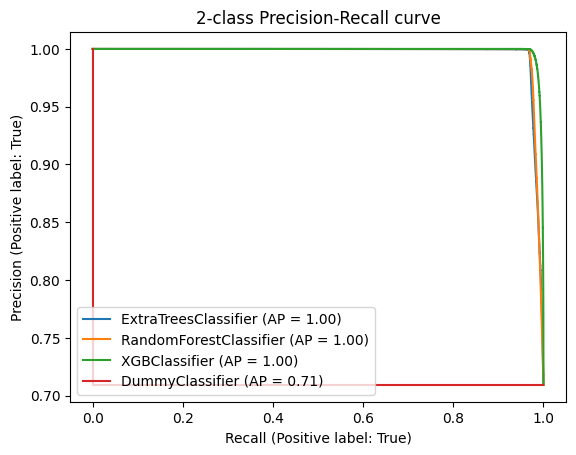

In [25]:
# Precision-Recall Curve

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
et_cls = build_et_classifier()
rf_cls = build_rf_classifier()
xgb_cls = build_xgb_classifier()
dum_cls = build_dummy_classifier()

et_cls.fit(X_train, y_train)
rf_cls.fit(X_train, y_train)
xgb_cls.fit(X_train, y_train)
dum_cls.fit(X_train, y_train)

ET_pr = PrecisionRecallDisplay.from_estimator(et_cls, X_train, y_train)
RF_pr = PrecisionRecallDisplay.from_estimator(rf_cls, X_train, y_train, ax=ET_pr.ax_)
XGB_pr = PrecisionRecallDisplay.from_estimator(xgb_cls, X_train, y_train, ax=ET_pr.ax_)
DUM_pr = PrecisionRecallDisplay.from_estimator(dum_cls, X_train, y_train, ax=ET_pr.ax_)

_ = ET_pr.ax_.set_title("2-class Precision-Recall curve")

#ETplot.figure_.suptitle('ROC Curve Comparison for ML Classifers on Test Set')

plt.show()

# Try with just calculated RSEQ LSEQ metrics

In [15]:
# Try removing features from VCF file and see if predictions are good
# Remove AF, HIAF, HICNT, VD, SN, ADJAF 

df_no_vcf_feats = df.drop(['AF', 'HIAF', 'HICNT', 'VD', 'SN', 'ADJAF'], axis=1)

X = df_no_vcf_feats.drop(["IS_ARTIFACT"], axis=1) # drop labels
y = df_no_vcf_feats["IS_ARTIFACT"].copy() # labels

cat_attribs = ['REF','ALT'] 
X_train_num = X.drop(cat_attribs, axis=1) 
num_attribs = list(X_train_num)

all_features = num_attribs + cat_attribs

In [19]:
len(all_features)

268

3-fold Cross-Validation...
Scores: [0.66666121 0.67207615 0.67150372]
Mean: 0.6700803608358225
Standard deviation: 0.0024289694104221793
Validating using train/test split


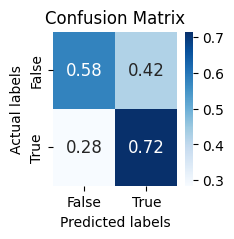

Test Metrics
Precision: 0.8060384738531832
Recall: 0.7154460928708863
Accuracy: 0.6758382694074258


In [20]:
# Extra Trees Classifier
def build_et_classifier():
    return ExtraTreesClassifier(
        n_estimators=100,
        max_depth=7, #3
        random_state=42,
        n_jobs=16,
        class_weight='balanced'
    )

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the Extra Trees model
et_cls = build_et_classifier()
X_train, X_test, y_train, y_test = preprocess_dataframe(df_no_vcf_feats)
train_and_evaluate_model(et_cls, X_train, X_test, y_train, y_test)

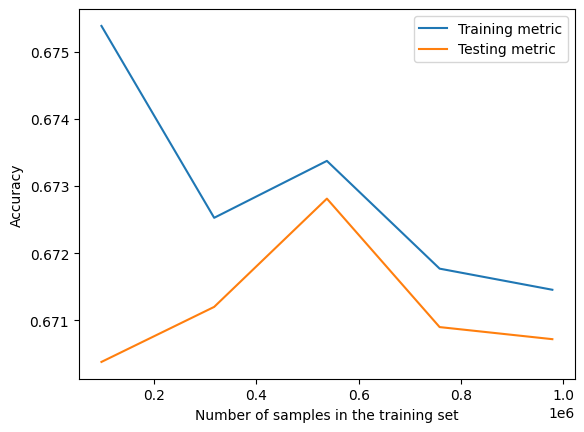

In [54]:
# types of scoring to use https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# accuracy, f1, precision, recall, roc_auc, neg_log_loss

# Accuracy learning curve was just the opposite of misclassification rate
acc_lc = LearningCurveDisplay.from_estimator(et_cls, X_train, y_train, scoring="accuracy", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Accuracy", std_display_style=None)

plt.show()

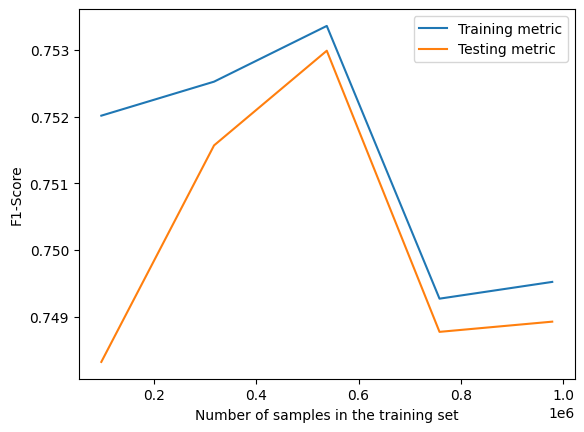

In [55]:
# F1 learning curve

f1_lc = LearningCurveDisplay.from_estimator(et_cls, X_train, y_train, scoring="f1", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="F1-Score", std_display_style=None)

plt.show()

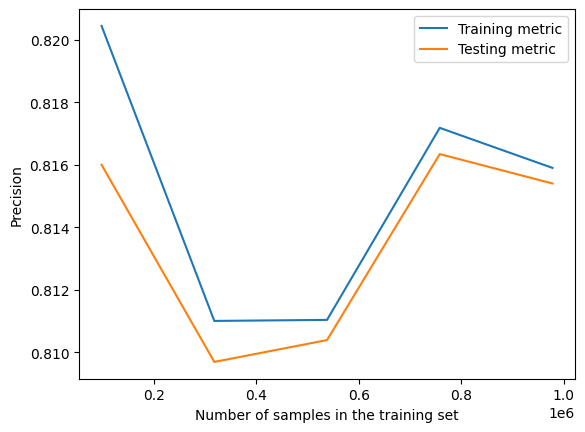

In [56]:
# Precision learning curve

prec_lc = LearningCurveDisplay.from_estimator(et_cls, X_train, y_train, scoring="precision", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Precision", std_display_style=None)

plt.show()

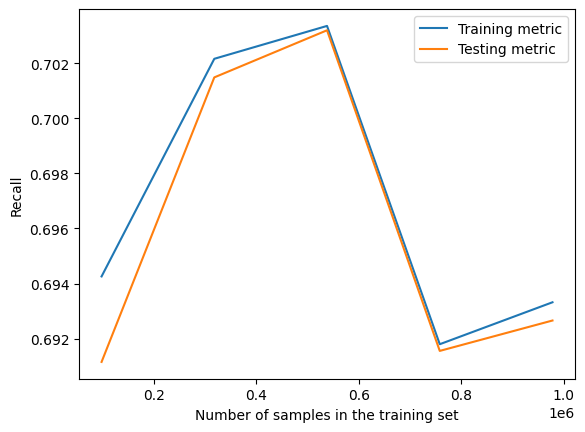

In [57]:
# Recall learning curve

rec_lc = LearningCurveDisplay.from_estimator(et_cls, X_train, y_train, scoring="recall", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Recall", std_display_style=None)

plt.show()

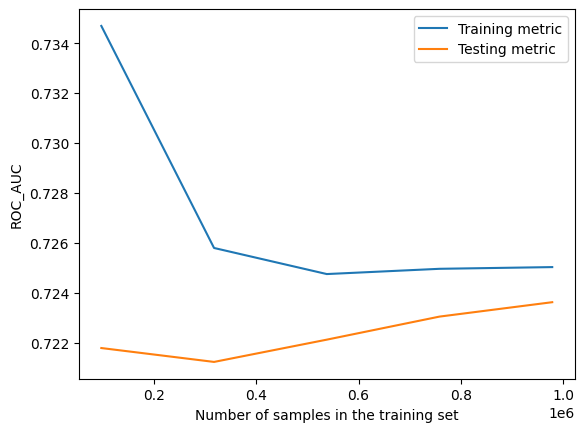

In [58]:
# ROC AUC learning curve

roc_lc = LearningCurveDisplay.from_estimator(et_cls, X_train, y_train, scoring="roc_auc", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="ROC_AUC", std_display_style=None)

plt.show()

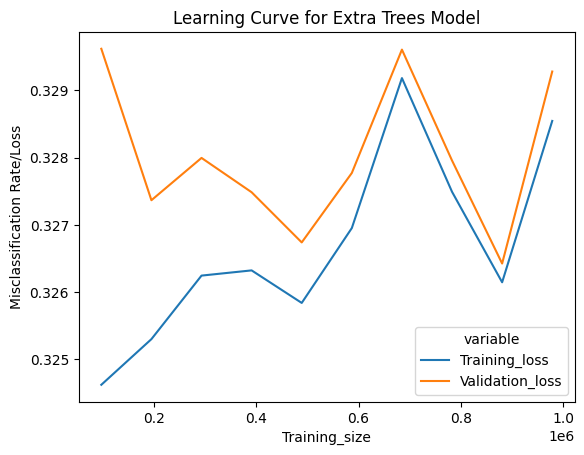

In [29]:
lc = learn_curve(et_cls, X_train, X_test, y_train, y_test)
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve for Extra Trees Model")
plt.ylabel("Misclassification Rate/Loss");

3-fold Cross-Validation...
Scores: [0.66868926 0.66912812 0.66925897]
Mean: 0.6690254489065143
Standard deviation: 0.00024365165738480583
Validating using train/test split


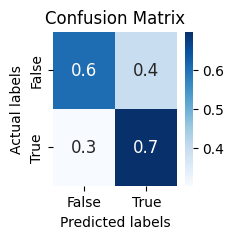

Test Metrics
Precision: 0.8118269961127742
Recall: 0.697799011456201
Accuracy: 0.6707082051044413


In [21]:
# Random Forest Classifier
def build_rf_classifier():
    return RandomForestClassifier(
        n_estimators=100,
        max_depth=7, #3
        random_state=42,
        n_jobs=16,
        class_weight='balanced'
    )

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the Random Forest model
rf_cls = build_rf_classifier()
#X_train, X_test, y_train, y_test = preprocess_dataframe(df_no_vcf_feats)
train_and_evaluate_model(rf_cls, X_train, X_test, y_train, y_test)

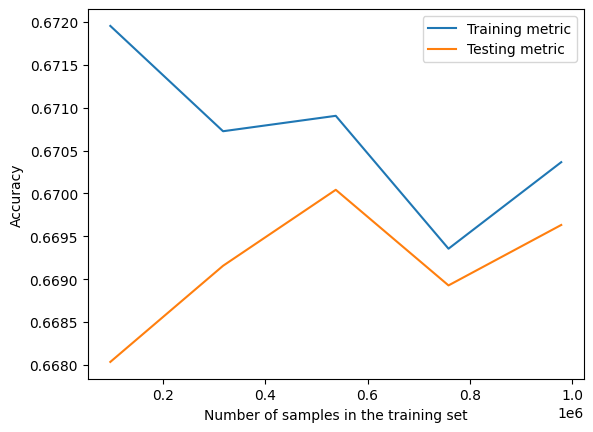

In [60]:
# types of scoring to use https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# accuracy, f1, precision, recall, roc_auc, neg_log_loss

# Accuracy learning curve was just the opposite of misclassification rate
acc_lc = LearningCurveDisplay.from_estimator(rf_cls, X_train, y_train, scoring="accuracy", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Accuracy", std_display_style=None)

plt.show()

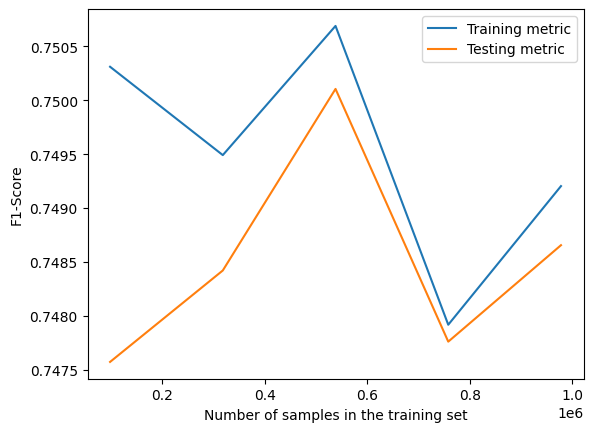

In [61]:
# F1 learning curve

f1_lc = LearningCurveDisplay.from_estimator(rf_cls, X_train, y_train, scoring="f1", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="F1-Score", std_display_style=None)

plt.show()

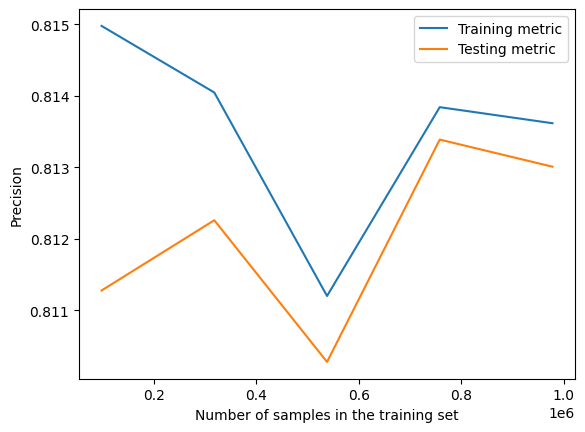

In [62]:
# Precision learning curve

prec_lc = LearningCurveDisplay.from_estimator(rf_cls, X_train, y_train, scoring="precision", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Precision", std_display_style=None)

plt.show()

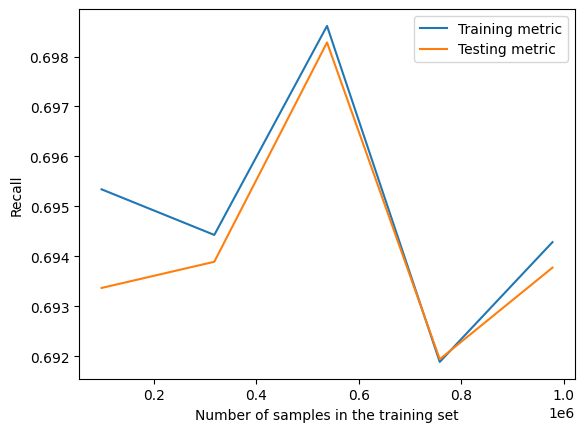

In [63]:
# Recall learning curve

rec_lc = LearningCurveDisplay.from_estimator(rf_cls, X_train, y_train, scoring="recall", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Recall", std_display_style=None)

plt.show()

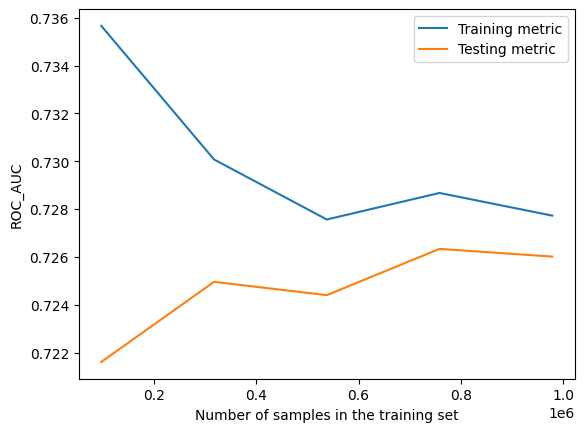

In [64]:
# ROC AUC learning curve

roc_lc = LearningCurveDisplay.from_estimator(rf_cls, X_train, y_train, scoring="roc_auc", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="ROC_AUC", std_display_style=None)

plt.show()

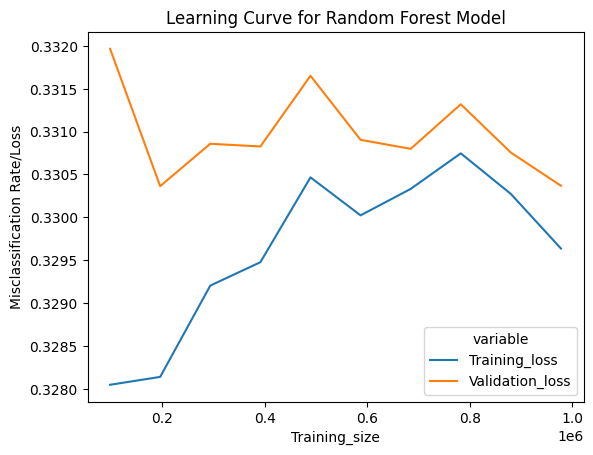

In [31]:
lc = learn_curve(rf_cls, X_train, X_test, y_train, y_test)
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve for Random Forest Model")
plt.ylabel("Misclassification Rate/Loss");

3-fold Cross-Validation...
Scores: [0.73074486 0.73009419 0.73069933]
Mean: 0.7305127896013248
Standard deviation: 0.0002965807535556698
Validating using train/test split


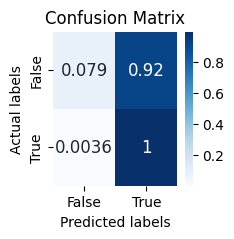

Test Metrics
Precision: 0.7257484761939395
Recall: 0.9964168167660715
Accuracy: 0.7302055024164729


In [22]:
# XGB Classifier
#('XGBClassifier', xgboost.XGBClassifier)
#('XGBClassifier', xgboost.sklearn.XGBClassifier)

#1834281 variant calls 1301098 artifacts, 533183 non-artifacts

# Artifacts are much more present in the data than non-artifacts

# For imbalanced binary classification dataset, negative class refers to the majority class (artifacts)
# positive class refers to the minority class (non-artifacts)

pos_records = len(y[y==False]) # positive records are minority class (non-artifacts)
neg_records = len(y[y==True]) # negative records are majority class (artifacts)
#scale_pos_weight=sum(negative instances)/sum(positive instances)
spw = neg_records / pos_records

def build_xgb_classifier():
    return xgboost.XGBClassifier(
        n_estimators=100,
        max_depth=7, #3
        random_state=42,
        n_jobs=16,
        scale_pos_weight=spw
    )

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the XGB model
xgb_cls = build_xgb_classifier()
#X_train, X_test, y_train, y_test = preprocess_dataframe(df_no_vcf_feats)
train_and_evaluate_model(xgb_cls, X_train, X_test, y_train, y_test)

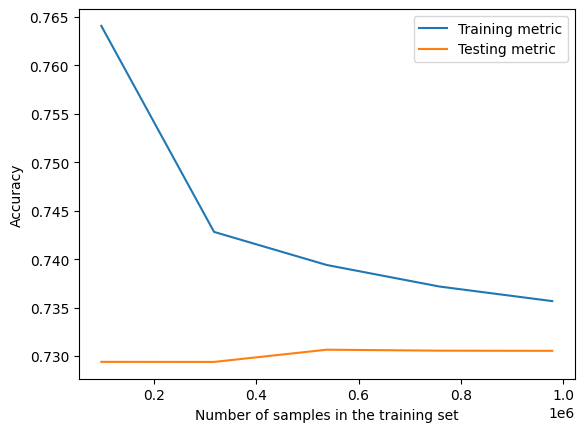

In [66]:
# types of scoring to use https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# accuracy, f1, precision, recall, roc_auc, neg_log_loss

# Accuracy learning curve was just the opposite of misclassification rate
acc_lc = LearningCurveDisplay.from_estimator(xgb_cls, X_train, y_train, scoring="accuracy", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Accuracy", std_display_style=None)

plt.show()

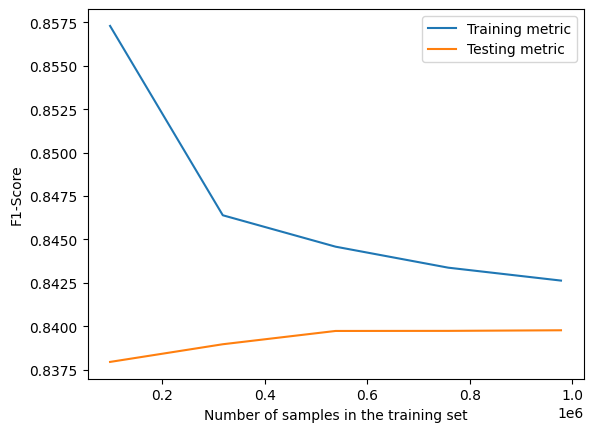

In [67]:
# F1 learning curve

f1_lc = LearningCurveDisplay.from_estimator(xgb_cls, X_train, y_train, scoring="f1", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="F1-Score", std_display_style=None)

plt.show()

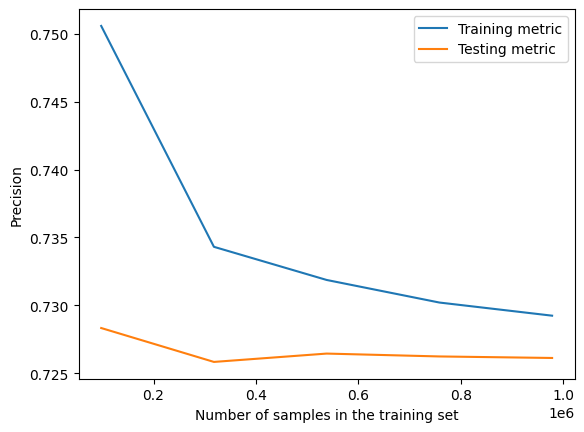

In [68]:
# Precision learning curve

prec_lc = LearningCurveDisplay.from_estimator(xgb_cls, X_train, y_train, scoring="precision", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Precision", std_display_style=None)

plt.show()

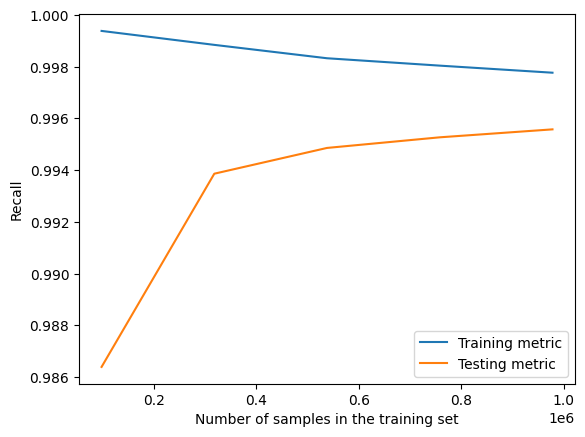

In [69]:
# Recall learning curve

rec_lc = LearningCurveDisplay.from_estimator(xgb_cls, X_train, y_train, scoring="recall", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="Recall", std_display_style=None)

plt.show()

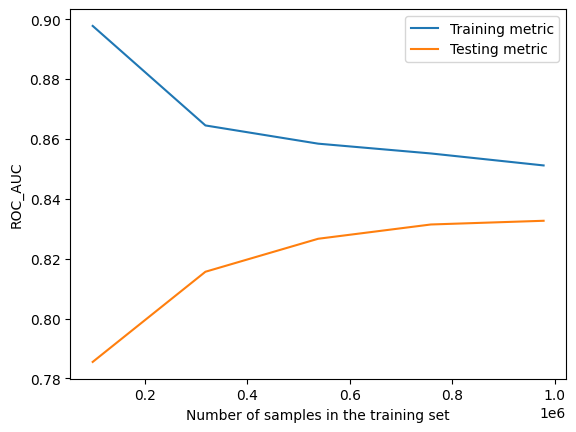

In [70]:
# ROC AUC learning curve

roc_lc = LearningCurveDisplay.from_estimator(xgb_cls, X_train, y_train, scoring="roc_auc", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="ROC_AUC", std_display_style=None)

plt.show()

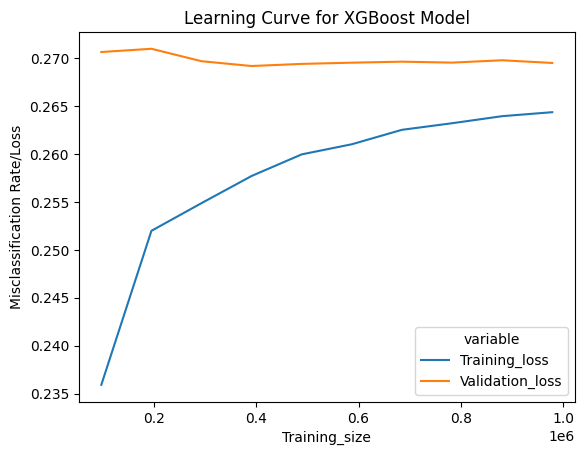

In [33]:
lc = learn_curve(xgb_cls, X_train, X_test, y_train, y_test)
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve for XGBoost Model")
plt.ylabel("Misclassification Rate/Loss");

In [2]:
1301098 / 1834281

0.7093231625906826

In [5]:
533183 / 1834281

0.2906768374093173

3-fold Cross-Validation...
Scores: [0.70921123 0.70921268 0.70921268]
Mean: 0.7092121977022092
Standard deviation: 6.834949033483003e-07
Validating using train/test split


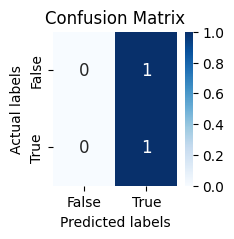

Precision: 0.7097670209373135
Recall: 1.0


In [34]:
# Dummy Classifier
def build_dummy_classifier():
    return DummyClassifier(strategy='prior', 
                           random_state=None, 
                           constant=None)

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the Dummy model
dum_cls = build_dummy_classifier()
#X_train, X_test, y_train, y_test = preprocess_dataframe(df_no_vcf_feats)
train_and_evaluate_model(dum_cls, X_train, X_test, y_train, y_test)

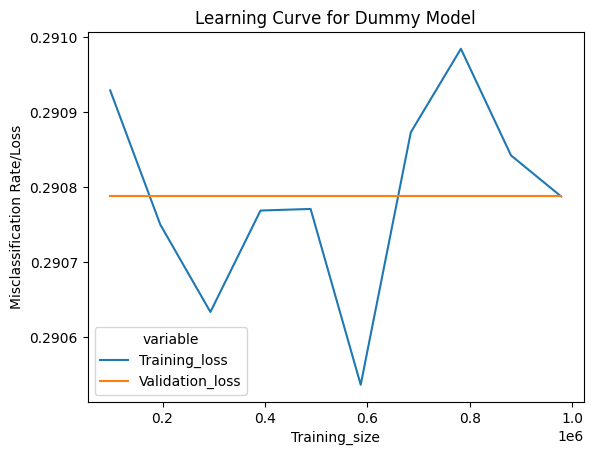

In [35]:
lc = learn_curve(dum_cls, X_train, X_test, y_train, y_test)
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve for Dummy Model")
plt.ylabel("Misclassification Rate/Loss");

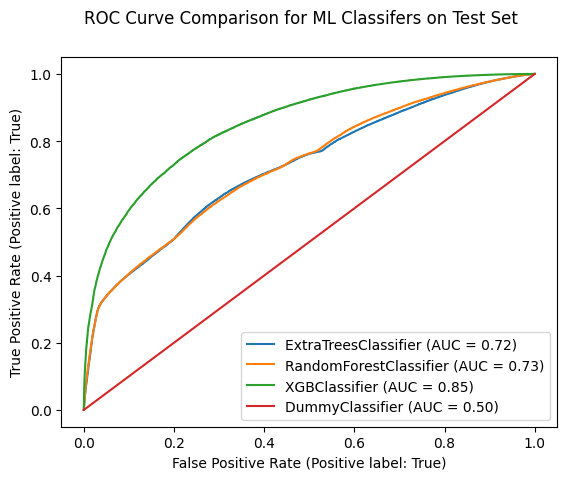

In [36]:
# Plot the test data using ROC curve and calculate AUC Scores

# Create a ROC Curve
#from sklearn import metrics

ETplot = plot_roc_curve(et_cls, X_train, y_train)
RFplot = plot_roc_curve(rf_cls, X_train, y_train, ax=ETplot.ax_)
XGBplot = plot_roc_curve(xgb_cls, X_train, y_train, ax=ETplot.ax_)
DUMplot = plot_roc_curve(dum_cls, X_train, y_train, ax=ETplot.ax_)

ETplot.figure_.suptitle('ROC Curve Comparison for ML Classifers on Test Set')

plt.show()

#ER 72
#RF 73
#XGB 85

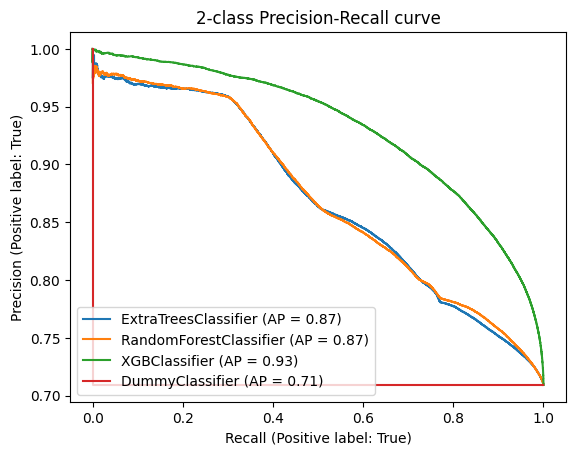

In [37]:
# Precision-Recall Curve

et_cls = build_et_classifier()
rf_cls = build_rf_classifier()
xgb_cls = build_xgb_classifier()
dum_cls = build_dummy_classifier()

et_cls.fit(X_train, y_train)
rf_cls.fit(X_train, y_train)
xgb_cls.fit(X_train, y_train)
dum_cls.fit(X_train, y_train)

ET_pr = PrecisionRecallDisplay.from_estimator(et_cls, X_train, y_train)
RF_pr = PrecisionRecallDisplay.from_estimator(rf_cls, X_train, y_train, ax=ET_pr.ax_)
XGB_pr = PrecisionRecallDisplay.from_estimator(xgb_cls, X_train, y_train, ax=ET_pr.ax_)
DUM_pr = PrecisionRecallDisplay.from_estimator(dum_cls, X_train, y_train, ax=ET_pr.ax_)

_ = ET_pr.ax_.set_title("2-class Precision-Recall curve")

#ETplot.figure_.suptitle('ROC Curve Comparison for ML Classifers on Test Set')

plt.show()

# Try with only features with 60% or greater predictive power

In [38]:
feat_min_pp60 = feat[:33]
drop_feat = set(feat) - set(feat_min_pp60)

In [39]:
# Try removing features from with less than 60% predictive power
# feat[:33] # 60.2% +

df_no_vcf_feats_min_pp60 = df_no_vcf_feats.drop(list(drop_feat) , axis=1)

In [40]:
df_no_vcf_feats_min_pp60 #274 - 6 vcf - 241 low pp + is_artifact = 28 columns

REF ALT  IS_ARTIFACT  HOMO_POLY_A  HOMO_POLY_T  AAAA  AAAT  \
CHROM POS                                                                    
chr1  826893      G   A        False            0            0     0     0   
      941119      A   G        False            0            0     0     0   
      944168      G   T         True            3            0     0     1   
      944858      A   G        False            0            0     0     0   
      946247      G   A        False            0            0     0     0   
...              ..  ..          ...          ...          ...   ...   ...   
chrX  143629683   G   A         True            3            3     0     1   
      143629724   T   A         True            3            3     0     1   
      143630393   T   A         True            3            3     0     1   
      143631074   A   G         True            4            3     1     2   
      143712338   T   G        False            0            0     0     0   

                 AATA  AATT  ATAA  ...  TTAA  TTAT  TTAC  TTAG  TTTA  TTTT  \
CHROM POS                          ...                                       
chr1  826893        0     0     0  ...     0     0     0     0     0     0   
      941119        0     0     0  ...     0     0     0     0     0     0   
      944168        0     0     0  ...     0     0     0     0     0     0   
      944858        0     1     0  ...     0     0     1     0     0     0   
      946247        0     0     0  ...     0     0     0     0     0     0   
...               ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
chrX  143629683     0     1     0  ...     1     0     0     0     1     0   
      143629724     0     1     0  ...     0     0     0     0     0     0   
      143630393     0     0     0  ...     0     1     0     0     0     0   
      143631074     0     0     0  ...     0     0     0     0     0     0   
      143712338     0     0     0  ...     0     0     0     0     0     0   

                 TTTC  CCCC  GAAA  GGGG  
CHROM POS                                
chr1  826893        0     1     0     0  
      941119        0     2     0     3  
      944168        0     0     0     3  
      944858        0     0     0     0  
      946247        0     1     0     0  
...               ...   ...   ...   ...  
chrX  143629683     0     0     0     0  
      143629724     1     0     0     0  
      143630393     1     0     0     0  
      143631074     0     0     2     0  
      143712338     0     0     0     0  

[1834281 rows x 28 columns]

In [41]:
X = df_no_vcf_feats_min_pp60.drop(["IS_ARTIFACT"], axis=1) # drop labels
y = df_no_vcf_feats_min_pp60["IS_ARTIFACT"].copy() # labels

cat_attribs = ['REF','ALT'] 
X_train_num = X.drop(cat_attribs, axis=1) 
num_attribs = list(X_train_num)

all_features = num_attribs + cat_attribs

In [42]:
len(all_features)

27

3-fold Cross-Validation...
Scores: [0.64478618 0.64448901 0.64529451]
Mean: 0.64485656502169
Standard deviation: 0.00033258675703917603
Validating using train/test split


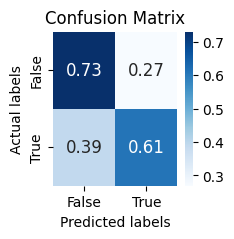

Precision: 0.847034205918777
Recall: 0.6094099845227992


In [43]:
# Extra Trees Classifier
def build_et_classifier():
    return ExtraTreesClassifier(
        n_estimators=100,
        max_depth=7, #3
        random_state=42,
        n_jobs=16,
        class_weight='balanced'
    )

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the Extra Trees model
et_cls = build_et_classifier()
X_train, X_test, y_train, y_test = preprocess_dataframe(df_no_vcf_feats_min_pp60)
train_and_evaluate_model(et_cls, X_train, X_test, y_train, y_test)

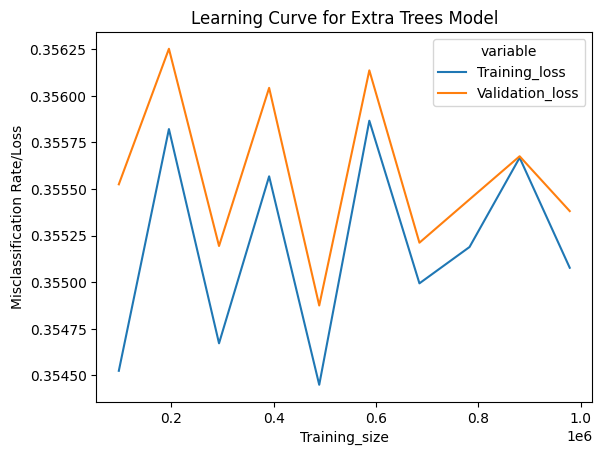

In [44]:
lc = learn_curve(et_cls, X_train, X_test, y_train, y_test)
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve for Extra Trees Model")
plt.ylabel("Misclassification Rate/Loss");

3-fold Cross-Validation...
Scores: [0.64022513 0.6425407  0.6428862 ]
Mean: 0.6418840101149232
Standard deviation: 0.0011814562648722077
Validating using train/test split


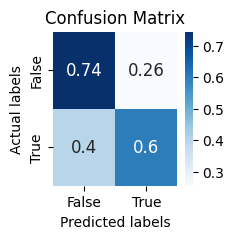

Precision: 0.8514410727502286
Recall: 0.6008610393151627


In [45]:
# Random Forest Classifier
def build_rf_classifier():
    return RandomForestClassifier(
        n_estimators=100,
        max_depth=7, #3
        random_state=42,
        n_jobs=16,
        class_weight='balanced'
    )

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the Random Forest model
rf_cls = build_rf_classifier()
#X_train, X_test, y_train, y_test = preprocess_dataframe(df_no_vcf_feats_min_pp60)
train_and_evaluate_model(rf_cls, X_train, X_test, y_train, y_test)

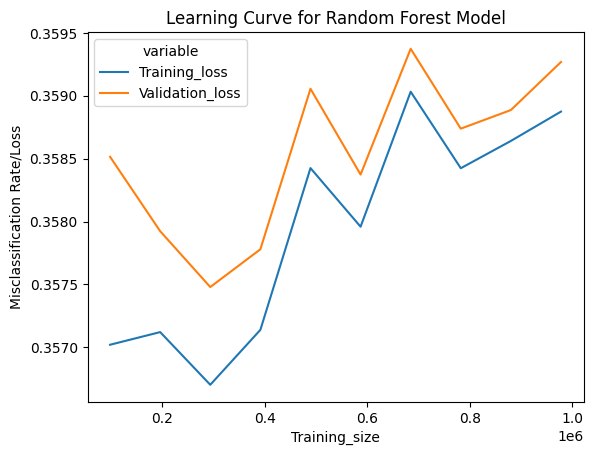

In [46]:
lc = learn_curve(rf_cls, X_train, X_test, y_train, y_test)
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve for Random Forest Model")
plt.ylabel("Misclassification Rate/Loss");

3-fold Cross-Validation...
Scores: [0.71991978 0.71842679 0.71917913]
Mean: 0.719175234462198
Standard deviation: 0.0006095147260930581
Validating using train/test split


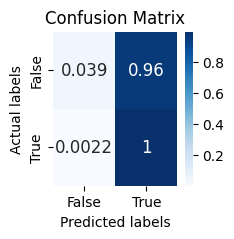

Precision: 0.717417356056506
Recall: 0.9978262789813467


In [47]:
# XGB Classifier
#('XGBClassifier', xgboost.XGBClassifier)
#('XGBClassifier', xgboost.sklearn.XGBClassifier)

#1834281 variant calls 1301098 artifacts, 533183 non-artifacts

# Artifacts are much more present in the data than non-artifacts

# For imbalanced binary classification dataset, negative class refers to the majority class (artifacts)
# positive class refers to the minority class (non-artifacts)

pos_records = len(y[y==False]) # positive records are minority class (non-artifacts)
neg_records = len(y[y==True]) # negative records are majority class (artifacts)
#scale_pos_weight=sum(negative instances)/sum(positive instances)
spw = neg_records / pos_records

def build_xgb_classifier():
    return xgboost.XGBClassifier(
        n_estimators=100,
        max_depth=7, #3
        random_state=42,
        n_jobs=16,
        scale_pos_weight=spw
    )

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the XGB model
xgb_cls = build_xgb_classifier()
#X_train, X_test, y_train, y_test = preprocess_dataframe(df_no_vcf_feats_min_pp60)
train_and_evaluate_model(xgb_cls, X_train, X_test, y_train, y_test)

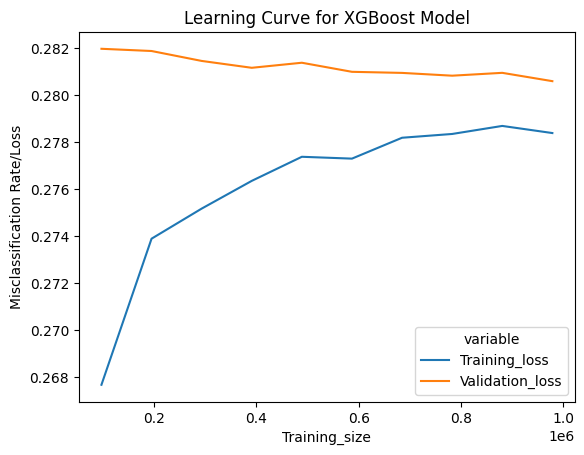

In [48]:
lc = learn_curve(xgb_cls, X_train, X_test, y_train, y_test)
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve for XGBoost Model")
plt.ylabel("Misclassification Rate/Loss");

3-fold Cross-Validation...
Scores: [0.70921123 0.70921268 0.70921268]
Mean: 0.7092121977022092
Standard deviation: 6.834949033483003e-07
Validating using train/test split


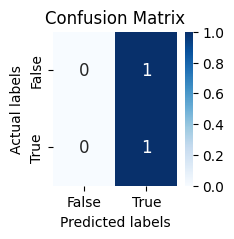

Precision: 0.7097670209373135
Recall: 1.0


In [49]:
# Dummy Classifier
def build_dummy_classifier():
    return DummyClassifier(strategy='prior', 
                           random_state=None, 
                           constant=None)

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the Dummy model
dum_cls = build_dummy_classifier()
#X_train, X_test, y_train, y_test = preprocess_dataframe(df_no_vcf_feats_min_pp60)
train_and_evaluate_model(dum_cls, X_train, X_test, y_train, y_test)

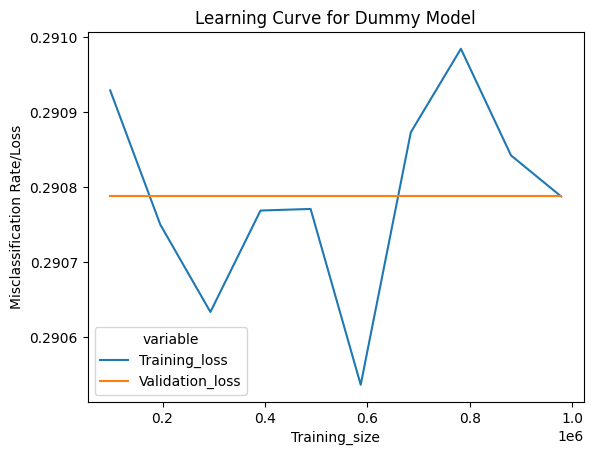

In [50]:
lc = learn_curve(dum_cls, X_train, X_test, y_train, y_test)
sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
plt.title("Learning Curve for Dummy Model")
plt.ylabel("Misclassification Rate/Loss");

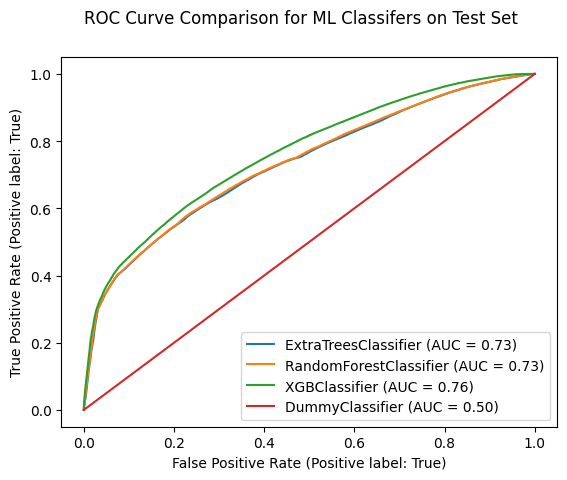

In [51]:
# Plot the test data using ROC curve and calculate AUC Scores

# Create a ROC Curve
#from sklearn import metrics

ETplot = plot_roc_curve(et_cls, X_train, y_train)
RFplot = plot_roc_curve(rf_cls, X_train, y_train, ax=ETplot.ax_)
XGBplot = plot_roc_curve(xgb_cls, X_train, y_train, ax=ETplot.ax_)
DUMplot = plot_roc_curve(dum_cls, X_train, y_train, ax=ETplot.ax_)

ETplot.figure_.suptitle('ROC Curve Comparison for ML Classifers on Test Set')

plt.show()

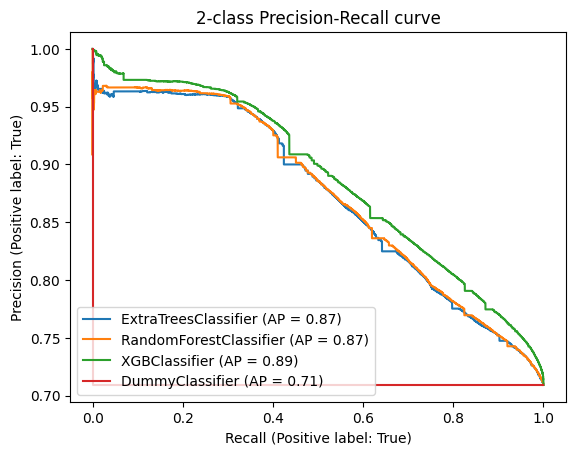

In [52]:
# Precision-Recall Curve

et_cls = build_et_classifier()
rf_cls = build_rf_classifier()
xgb_cls = build_xgb_classifier()
dum_cls = build_dummy_classifier()

et_cls.fit(X_train, y_train)
rf_cls.fit(X_train, y_train)
xgb_cls.fit(X_train, y_train)
dum_cls.fit(X_train, y_train)

ET_pr = PrecisionRecallDisplay.from_estimator(et_cls, X_train, y_train)
RF_pr = PrecisionRecallDisplay.from_estimator(rf_cls, X_train, y_train, ax=ET_pr.ax_)
XGB_pr = PrecisionRecallDisplay.from_estimator(xgb_cls, X_train, y_train, ax=ET_pr.ax_)
DUM_pr = PrecisionRecallDisplay.from_estimator(dum_cls, X_train, y_train, ax=ET_pr.ax_)

_ = ET_pr.ax_.set_title("2-class Precision-Recall curve")

#ETplot.figure_.suptitle('ROC Curve Comparison for ML Classifers on Test Set')

plt.show()

# Variable clustering with VarClusHi

In [18]:
from varclushi import VarClusHi

In [16]:
# Try variable clustering with all features (except provided vcf feats)
df_no_vcf_feats = df.drop(['AF', 'HIAF', 'HICNT', 'VD', 'SN', 'ADJAF'], axis=1)
df_no_vcf_feats

REF ALT  IS_ARTIFACT     A     T     C     G  HOMO_POLY_A  \
CHROM POS                                                                   
chr1  826893      G   A        False 50.00 25.00 60.00 65.00            0   
      941119      A   G        False 25.00 35.00 65.00 75.00            0   
      944168      G   T         True 35.00 45.00 35.00 85.00            3   
      944858      A   G        False 65.00 50.00 45.00 40.00            0   
      946247      G   A        False 25.00 50.00 55.00 70.00            0   
...              ..  ..          ...   ...   ...   ...   ...          ...   
chrX  143629683   G   A         True 70.00 65.00 25.00 40.00            3   
      143629724   T   A         True 60.00 65.00 40.00 35.00            3   
      143630393   T   A         True 55.00 75.00 30.00 40.00            3   
      143631074   A   G         True 75.00 40.00 40.00 45.00            4   
      143712338   T   G        False 20.00 70.00 60.00 50.00            0   

                 HOMO_POLY_T  HOMO_POLY_C  ...  GGTC  GGTG  GGCA  GGCT  GGCC  \
CHROM POS                                  ...                                 
chr1  826893               0            4  ...     0     0     0     0     0   
      941119               0            5  ...     0     0     0     0     0   
      944168               0            0  ...     0     1     0     0     1   
      944858               0            0  ...     0     0     0     0     0   
      946247               0            4  ...     1     1     0     1     0   
...                      ...          ...  ...   ...   ...   ...   ...   ...   
chrX  143629683            3            0  ...     0     0     1     0     0   
      143629724            3            0  ...     0     1     0     0     0   
      143630393            3            0  ...     0     0     0     0     0   
      143631074            3            0  ...     0     0     0     1     0   
      143712338            0            0  ...     0     0     0     0     0   

                 GGCG  GGGA  GGGT  GGGC  GGGG  
CHROM POS                                      
chr1  826893        0     1     0     0     0  
      941119        1     0     0     1     3  
      944168        0     0     2     1     3  
      944858        0     0     0     0     0  
      946247        0     0     1     0     0  
...               ...   ...   ...   ...   ...  
chrX  143629683     0     0     0     0     0  
      143629724     0     0     0     0     0  
      143630393     0     1     0     0     0  
      143631074     0     0     0     1     0  
      143712338     0     0     0     0     0  

[1834281 rows x 269 columns]

In [17]:
X = df_no_vcf_feats.drop(["IS_ARTIFACT"], axis=1) # drop labels
y = df_no_vcf_feats["IS_ARTIFACT"].copy() # labels

cat_attribs = ['REF','ALT'] 
X_train_num = X.drop(cat_attribs, axis=1) 
num_attribs = list(X_train_num)

all_features = num_attribs + cat_attribs

In [18]:
len(all_features)

268

In [108]:
def preprocess_whole_dataframe(df):
    # Numerical and categorical features are placed in the pipeline here
    
    # Build pipeline
    num_pipeline =  Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # fill in missing values with median values
        ('std_scaler', StandardScaler()),              # feature scaling
        ])
    
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ])

    # df_transformed is the full feature set. Now ready to use.
    #fitted = full_pipeline.fit(df)
    #df_transformed = fitted.transform(df)
    
    X = df.drop(["IS_ARTIFACT"], axis=1) # drop labels
    y = df["IS_ARTIFACT"].copy() # labels
    
    df_transformed = full_pipeline.fit_transform(X)

    # The arrays passed to models.
    X = df_transformed
    #y = df.IS_ARTIFACT
    assert(X.shape[0] == y.shape[0])
    
    # Later do `full_pipeline.transform(test_only_df)
    
    # Train, test, and split the data ### MOVE THIS TO BEFORE CROSS VALIDATION ###
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X, y #X_train, X_test, y_train, y_test 

In [21]:
X, y = preprocess_whole_dataframe(df_no_vcf_feats)

In [22]:
X.shape

(1834281, 274)

In [23]:
artifact_train_cat = df_no_vcf_feats[cat_attribs]
artifact_train_cat.head()

REF ALT
CHROM POS           
chr1  826893   G   A
      941119   A   G
      944168   G   T
      944858   A   G
      946247   G   A

In [24]:
# One-hot code categorical attributes
cat_encoder = OneHotEncoder()
artifact_train_cat_1hot = cat_encoder.fit_transform(artifact_train_cat)
artifact_train_cat_1hot # 2D SciPy sparse matrix

<1834281x8 sparse matrix of type '<class 'numpy.float64'>'
	with 3668562 stored elements in Compressed Sparse Row format>

In [25]:
cat_encoder.categories_ #cat_attribs = ['REF','ALT']

[array(['A', 'C', 'G', 'T'], dtype=object),
 array(['A', 'C', 'G', 'T'], dtype=object)]

In [26]:
cat_onehot_col = [f'{pre}_{suff}' for pre in cat_attribs for suff in cat_encoder.categories_[0].tolist()]

In [27]:
cat_onehot_col

['REF_A', 'REF_C', 'REF_G', 'REF_T', 'ALT_A', 'ALT_C', 'ALT_G', 'ALT_T']

In [28]:
col = df_no_vcf_feats.columns.tolist()
col.remove('IS_ARTIFACT')
col.remove('REF')
col.remove('ALT')

In [29]:
col += cat_onehot_col

In [30]:
len(col)

274

In [33]:
vc_df = pd.DataFrame(X, columns=col)
vc_df

,A,T,C,G,HOMO_POLY_A,HOMO_POLY_T,HOMO_POLY_C,HOMO_POLY_G,PALINDROME,HAIRPIN,...,GGGC,GGGG,REF_A,REF_C,REF_G,REF_T,ALT_A,ALT_C,ALT_G,ALT_T
0,0.11,-1.18,0.40,0.67,-0.71,-0.71,1.48,0.92,-1.65,-0.57,...,-0.43,-0.34,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
1,-1.18,-0.67,0.65,1.18,-0.71,-0.71,2.04,2.63,-0.05,-0.57,...,1.65,4.60,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,-0.66,-0.16,-0.87,1.68,0.95,-0.71,-0.80,2.06,-0.05,-0.57,...,1.65,4.60,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3,0.88,0.10,-0.36,-0.60,-0.71,-0.71,-0.80,-0.79,-0.05,-0.57,...,-0.43,-0.34,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,-1.18,0.10,0.14,0.92,-0.71,-0.71,1.48,0.92,0.75,-0.57,...,-0.43,-0.34,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834276,1.14,0.87,-1.38,-0.60,0.95,0.95,-0.80,-0.79,1.55,-0.57,...,-0.43,-0.34,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
1834277,0.62,0.87,-0.62,-0.86,0.95,0.95,-0.80,-0.79,-0.05,-0.57,...,-0.43,-0.34,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
1834278,0.36,1.38,-1.12,-0.60,0.95,0.95,-0.80,0.92,-0.05,-0.57,...,-0.43,-0.34,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
1834279,1.39,-0.41,-0.62,-0.35,1.51,0.95,-0.80,0.92,-0.05,1.99,...,1.65,-0.34,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [35]:
# vc = VarClusHi(vc_df)
# start = time.time()
# vc.varclus()
# end=time.time()
# print(f'Variable Clustering Time: {(end-start)/60} min')

# Variable Clustering Time: 123.09099074999492 min

In [36]:
start = time.time()

with open('varclushi_object.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    # Keeps object type during pickling
    vc = VarClusHi(vc_df)
    vc.varclus()
    pickle.dump(vc, f, pickle.HIGHEST_PROTOCOL)   
    
end=time.time()
print(f'Variable Clustering Time: {(end-start)/60} min')

PicklingError: Can't pickle <class 'varclushi.varclushi.ClusInfo'>: attribute lookup ClusInfo on varclushi.varclushi failed

In [37]:
vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,3,1.99,0.58,0.66
1,1,3,1.44,0.94,0.48
2,2,6,2.94,1.00,0.49
3,3,6,2.97,1.00,0.50
4,4,5,2.38,0.95,0.48
...,...,...,...,...,...
99,99,1,1.00,0.00,1.00
100,100,1,1.00,0.00,1.00
101,101,1,1.00,0.00,1.00
102,102,1,1.00,0.00,1.00


In [40]:
#vc.info.to_pickle('vc_info.pkl') 

In [38]:
vc.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,CCGC,0.72,0.08,0.30
1,0,CGCC,0.66,0.10,0.37
2,0,GCCG,0.60,0.10,0.44
3,1,TGGA,0.32,0.04,0.72
4,1,GAAG,0.46,0.18,0.66
...,...,...,...,...,...
269,99,TACG,1.00,0.02,0.00
270,100,TGCC,1.00,0.08,0.00
271,101,GCTA,1.00,0.04,0.00
272,102,ALT_A,1.00,0.18,0.00


In [42]:
#vc.rsquare.to_pickle('vc_rsquare.pkl') 

In [13]:
vc_rsquare = pd.read_pickle('vc_rsquare.pkl')

In [19]:
vc_rsquare.head()

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,CCGC,0.72,0.08,0.30
1,0,CGCC,0.66,0.10,0.37
2,0,GCCG,0.60,0.10,0.44
3,1,TGGA,0.32,0.04,0.72
4,1,GAAG,0.46,0.18,0.66


In [76]:
(vc_rsquare['Cluster'].value_counts() == 1).value_counts()
# 104 clusters total
# 14 clusters contain a single feature
# 90 clusters contain 2 or more features

False    90
True     14
Name: Cluster, dtype: int64

In [118]:
df_no_vcf_feats

REF ALT  IS_ARTIFACT     A     T     C     G  HOMO_POLY_A  \
CHROM POS                                                                   
chr1  826893      G   A        False 50.00 25.00 60.00 65.00            0   
      941119      A   G        False 25.00 35.00 65.00 75.00            0   
      944168      G   T         True 35.00 45.00 35.00 85.00            3   
      944858      A   G        False 65.00 50.00 45.00 40.00            0   
      946247      G   A        False 25.00 50.00 55.00 70.00            0   
...              ..  ..          ...   ...   ...   ...   ...          ...   
chrX  143629683   G   A         True 70.00 65.00 25.00 40.00            3   
      143629724   T   A         True 60.00 65.00 40.00 35.00            3   
      143630393   T   A         True 55.00 75.00 30.00 40.00            3   
      143631074   A   G         True 75.00 40.00 40.00 45.00            4   
      143712338   T   G        False 20.00 70.00 60.00 50.00            0   

                 HOMO_POLY_T  HOMO_POLY_C  ...  GGTC  GGTG  GGCA  GGCT  GGCC  \
CHROM POS                                  ...                                 
chr1  826893               0            4  ...     0     0     0     0     0   
      941119               0            5  ...     0     0     0     0     0   
      944168               0            0  ...     0     1     0     0     1   
      944858               0            0  ...     0     0     0     0     0   
      946247               0            4  ...     1     1     0     1     0   
...                      ...          ...  ...   ...   ...   ...   ...   ...   
chrX  143629683            3            0  ...     0     0     1     0     0   
      143629724            3            0  ...     0     1     0     0     0   
      143630393            3            0  ...     0     0     0     0     0   
      143631074            3            0  ...     0     0     0     1     0   
      143712338            0            0  ...     0     0     0     0     0   

                 GGCG  GGGA  GGGT  GGGC  GGGG  
CHROM POS                                      
chr1  826893        0     1     0     0     0  
      941119        1     0     0     1     3  
      944168        0     0     2     1     3  
      944858        0     0     0     0     0  
      946247        0     0     1     0     0  
...               ...   ...   ...   ...   ...  
chrX  143629683     0     0     0     0     0  
      143629724     0     0     0     0     0  
      143630393     0     1     0     0     0  
      143631074     0     0     0     1     0  
      143712338     0     0     0     0     0  

[1834281 rows x 269 columns]

In [91]:
vc_rsquare[vc_rsquare['Cluster'] == 0]

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,CCGC,0.72,0.08,0.30
1,0,CGCC,0.66,0.10,0.37
2,0,GCCG,0.60,0.10,0.44


In [92]:
for feat in vc_rsquare.loc[vc_rsquare['Cluster'] == 0, 'Variable'].to_list():
    print(feat, feature_order.index(feat))

CCGC 168
CGCC 147
GCCG 194


In [93]:
vc_rsquare.loc[vc_rsquare['Cluster'] == 0, 'Variable'].to_list()

['CCGC', 'CGCC', 'GCCG']

In [95]:
feature_order.index('GCCG')

194

In [96]:
feature_order[194]

'GCCG'

In [61]:
idx_list = []
for feat in vc_rsquare.loc[vc_rsquare['Cluster'] == 0, 'Variable'].to_list():
    idx_list.append(feature_order.index(feat))

In [62]:
idx_list

[168, 147, 194]

In [63]:
idx_list.sort()

In [64]:
idx_list

[147, 168, 194]

In [65]:
idx_list[:len(idx_list) * 3//4] # index of feature_order features to keep

[147, 168]

In [ ]:
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

vc_clus = filter_rows_by_values(vc_rsquare, "Cluster", clus_1_feat_list)
vc_clus

In [19]:
# number of clusters
clus_list = [i for i in range(104)]
len(clus_list)

104

In [20]:
# https://towardsdatascience.com/characteristics-of-a-good-feature-4f1ac7a90a42
# take 3/4 most predictive features from each cluster to reduce total features for classification
# clusters with 1 feature will be removed since 3//4 truncates to 0

cat = ['REF_A', 'REF_C', 'REF_G', 'REF_T', 'ALT_A', 'ALT_C', 'ALT_G', 'ALT_T']
final_idx_to_keep = []
for clus in clus_list:     
    clus_ft_list = vc_rsquare.loc[vc_rsquare['Cluster']==clus, 'Variable'].to_list() #['CCGC', 'CGCC', 'GCCG'] for cluster 0
    idx = [feature_order.index(feat) for feat in clus_ft_list if feat not in cat] # index in feature_order of features for each cluster
    idx.sort() #[147, 168, 194]
    idx_to_keep = idx[:len(idx) * 3//4] # index of feature_order features to keep
    final_idx_to_keep += idx_to_keep

In [21]:
len(final_idx_to_keep)

162

In [22]:
# get list of features from final_idx_to_keep
feats_keep = ['IS_ARTIFACT', 'REF', 'ALT']
for idx in final_idx_to_keep:
    feat = feature_order[idx]
    feats_keep.append(feat)

In [23]:
clus_df = df_no_vcf_feats[feats_keep]

In [24]:
clus_df

IS_ARTIFACT REF ALT  CGCC  CCGC  GGAA  TGGA  AAAA  GAAA  \
CHROM POS                                                                  
chr1  826893           False   G   A     0     1     0     0     0     0   
      941119           False   A   G     0     0     0     0     0     0   
      944168            True   G   T     0     0     0     0     0     0   
      944858           False   A   G     0     0     1     0     0     0   
      946247           False   G   A     0     0     0     0     0     0   
...                      ...  ..  ..   ...   ...   ...   ...   ...   ...   
chrX  143629683         True   G   A     0     0     0     1     0     0   
      143629724         True   T   A     0     0     0     0     0     0   
      143630393         True   T   A     0     0     0     0     0     0   
      143631074         True   A   G     0     0     0     0     1     2   
      143712338        False   T   G     0     0     0     2     0     0   

                 HOMO_POLY_A  ...  TAAA  GGGT  ATAA  HAIRPIN  PALINDROME  \
CHROM POS                     ...                                          
chr1  826893               0  ...     0     0     0        0           0   
      941119               0  ...     0     0     0        0           4   
      944168               3  ...     0     2     0        0           4   
      944858               0  ...     0     0     0        0           4   
      946247               0  ...     0     1     0        0           6   
...                      ...  ...   ...   ...   ...      ...         ...   
chrX  143629683            3  ...     0     0     0        0           8   
      143629724            3  ...     0     0     0        0           4   
      143630393            3  ...     1     0     0        0           4   
      143631074            4  ...     0     0     0        7           4   
      143712338            0  ...     0     0     0        0           0   

                 TAGC  AAGT  TTTG  GTTT  CAAA  
CHROM POS                                      
chr1  826893        0     0     0     0     0  
      941119        1     0     0     0     0  
      944168        0     0     0     0     1  
      944858        0     0     0     0     0  
      946247        0     0     0     0     0  
...               ...   ...   ...   ...   ...  
chrX  143629683     0     1     1     1     1  
      143629724     0     0     0     0     2  
      143630393     1     0     0     1     0  
      143631074     0     0     1     0     1  
      143712338     0     0     0     0     0  

[1834281 rows x 165 columns]

In [23]:
#clus_df.to_pickle('VarClusHi_ML_df_joined_LR_feats.pkl')
clus_df = pd.read_pickle('VarClusHi_ML_df_joined_LR_feats.pkl')

In [24]:
X = clus_df.drop(["IS_ARTIFACT"], axis=1) # drop labels
y = clus_df["IS_ARTIFACT"].copy() # labels

cat_attribs = ['REF','ALT'] 
X_train_num = X.drop(cat_attribs, axis=1) 
num_attribs = list(X_train_num)

all_features = num_attribs + cat_attribs

In [25]:
len(all_features)

164

3-fold Cross-Validation...
Scores: [0.66816385 0.66575486 0.66973122]
Mean: 0.667883310971788
Standard deviation: 0.0016354167257954086
Validating using train/test split


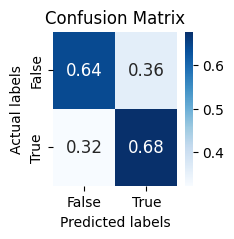

Test Metrics
Precision: 0.8219682131064973
Recall: 0.6768990295065346
Accuracy: 0.6666139667499871


In [26]:
# Extra Trees Classifier
def build_et_classifier():
    return ExtraTreesClassifier(
        n_estimators=100,
        max_depth=7, #3
        random_state=42,
        n_jobs=16,
        class_weight='balanced'
    )

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the Extra Trees model
et_cls = build_et_classifier()
X_train, X_test, y_train, y_test = preprocess_dataframe(clus_df)
train_and_evaluate_model(et_cls, X_train, X_test, y_train, y_test)

3-fold Cross-Validation...
Scores: [0.65221347 0.67128906 0.65996717]
Mean: 0.6611565634357185
Standard deviation: 0.007832858689697837
Validating using train/test split


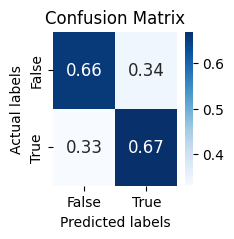

Test Metrics
Precision: 0.8267649708406429
Recall: 0.6696788960876863
Accuracy: 0.6659543091722387


In [27]:
# Random Forest Classifier
def build_rf_classifier():
    return RandomForestClassifier(
        n_estimators=100,
        max_depth=7, #3
        random_state=42,
        n_jobs=16,
        class_weight='balanced'
    )

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the Random Forest model
rf_cls = build_rf_classifier()
#X_train, X_test, y_train, y_test = preprocess_dataframe(df_no_vcf_feats)
train_and_evaluate_model(rf_cls, X_train, X_test, y_train, y_test)

3-fold Cross-Validation...
Scores: [0.72750244 0.72743647 0.726218  ]
Mean: 0.7270523035945033
Standard deviation: 0.0005905544897172187
Validating using train/test split


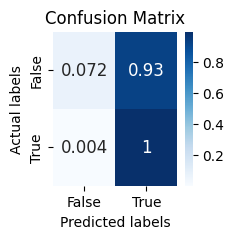

Test Metrics
Precision: 0.7241439972299633
Recall: 0.9959521166896457
Accuracy: 0.7278421837391681


In [28]:
# XGB Classifier
#('XGBClassifier', xgboost.XGBClassifier)
#('XGBClassifier', xgboost.sklearn.XGBClassifier)

#1834281 variant calls 1301098 artifacts, 533183 non-artifacts

# Artifacts are much more present in the data than non-artifacts

# For imbalanced binary classification dataset, negative class refers to the majority class (artifacts)
# positive class refers to the minority class (non-artifacts)

pos_records = len(y[y==False]) # positive records are minority class (non-artifacts)
neg_records = len(y[y==True]) # negative records are majority class (artifacts)
#scale_pos_weight=sum(negative instances)/sum(positive instances)
spw = neg_records / pos_records

def build_xgb_classifier():
    return xgboost.XGBClassifier(
        n_estimators=100,
        max_depth=7, #3
        random_state=42,
        n_jobs=16,
        scale_pos_weight=spw
    )

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the XGB model
xgb_cls = build_xgb_classifier()
#X_train, X_test, y_train, y_test = preprocess_dataframe(df_no_vcf_feats)
train_and_evaluate_model(xgb_cls, X_train, X_test, y_train, y_test)

3-fold Cross-Validation...
Scores: [0.70921123 0.70921268 0.70921268]
Mean: 0.7092121977022092
Standard deviation: 6.834949033483003e-07
Validating using train/test split


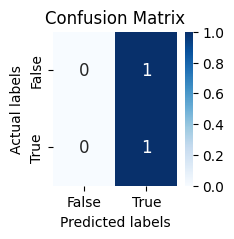

Precision: 0.7097670209373135
Recall: 1.0


In [121]:
# Dummy Classifier
def build_dummy_classifier():
    return DummyClassifier(strategy='prior', 
                           random_state=None, 
                           constant=None)

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the Dummy model
dum_cls = build_dummy_classifier()
#X_train, X_test, y_train, y_test = preprocess_dataframe(df_no_vcf_feats_min_pp60)
train_and_evaluate_model(dum_cls, X_train, X_test, y_train, y_test)

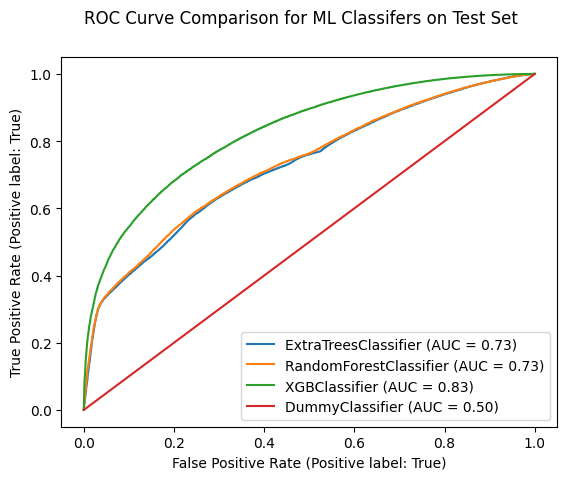

In [122]:
# Plot the test data using ROC curve and calculate AUC Scores

# Create a ROC Curve
#from sklearn import metrics

et_cls = build_et_classifier()
rf_cls = build_rf_classifier()
xgb_cls = build_xgb_classifier()
dum_cls = build_dummy_classifier()

et_cls.fit(X_train, y_train)
rf_cls.fit(X_train, y_train)
xgb_cls.fit(X_train, y_train)
dum_cls.fit(X_train, y_train)

ETplot = RocCurveDisplay.from_estimator(et_cls, X_train, y_train)
RFplot = RocCurveDisplay.from_estimator(rf_cls, X_train, y_train, ax=ETplot.ax_)
XGBplot = RocCurveDisplay.from_estimator(xgb_cls, X_train, y_train, ax=ETplot.ax_)
DUMplot = RocCurveDisplay.from_estimator(dum_cls, X_train, y_train, ax=ETplot.ax_)

#ETplot = plot_roc_curve(et_cls, X_train, y_train)
#RFplot = plot_roc_curve(rf_cls, X_train, y_train, ax=ETplot.ax_)
#XGBplot = plot_roc_curve(xgb_cls, X_train, y_train, ax=ETplot.ax_)
#DUMplot = plot_roc_curve(dum_cls, X_train, y_train, ax=ETplot.ax_)

ETplot.figure_.suptitle('ROC Curve Comparison for ML Classifers on Test Set')

plt.show()

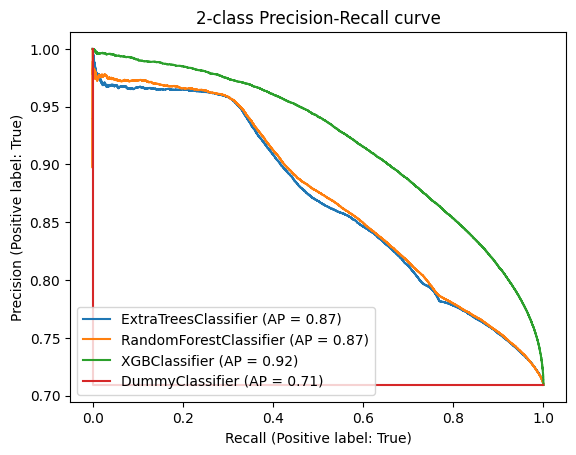

In [123]:
# Precision-Recall Curve

et_cls = build_et_classifier()
rf_cls = build_rf_classifier()
xgb_cls = build_xgb_classifier()
dum_cls = build_dummy_classifier()

et_cls.fit(X_train, y_train)
rf_cls.fit(X_train, y_train)
xgb_cls.fit(X_train, y_train)
dum_cls.fit(X_train, y_train)

ET_pr = PrecisionRecallDisplay.from_estimator(et_cls, X_train, y_train)
RF_pr = PrecisionRecallDisplay.from_estimator(rf_cls, X_train, y_train, ax=ET_pr.ax_)
XGB_pr = PrecisionRecallDisplay.from_estimator(xgb_cls, X_train, y_train, ax=ET_pr.ax_)
DUM_pr = PrecisionRecallDisplay.from_estimator(dum_cls, X_train, y_train, ax=ET_pr.ax_)

_ = ET_pr.ax_.set_title("2-class Precision-Recall curve")

#ETplot.figure_.suptitle('ROC Curve Comparison for ML Classifers on Test Set')

plt.show()

In [1]:
# Baseline score
1301098 / 1834281 

0.7093231625906826

# Hyperparameter tuning
# Randomized Search

In [32]:
# change max_features high=n_features later
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }


# removed max_depth - nodes are expanded until all leaves are pure 
forest_cls = RandomForestClassifier(random_state=42,
                                   n_jobs=16,
                                   class_weight='balanced')

# accuracy, f1, precision, recall, roc_auc, neg_log_loss
rnd_search = RandomizedSearchCV(forest_cls, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring = 'precision', 
                                random_state=42)

X_train, X_test, y_train, y_test = preprocess_dataframe(clus_df)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=16,
                                                    random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2b527d7885e0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2b527ceba7d0>},
                   random_state=42, scoring='precision')

In [33]:
rnd_search.best_params_

{'max_features': 5, 'n_estimators': 2}

In [34]:
pd.DataFrame(rnd_search.cv_results_).to_pickle('rnd_search_RF.pkl')

In [37]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9851786182026239 {'max_features': 7, 'n_estimators': 180}
0.984994535823059 {'max_features': 5, 'n_estimators': 15}
0.9851749415695196 {'max_features': 3, 'n_estimators': 72}
0.9850304493714 {'max_features': 5, 'n_estimators': 21}
0.9851813037705395 {'max_features': 7, 'n_estimators': 122}
0.9851722552323621 {'max_features': 3, 'n_estimators': 75}
0.9851740787600072 {'max_features': 3, 'n_estimators': 88}
0.9851786909523478 {'max_features': 5, 'n_estimators': 100}
0.9851759742340473 {'max_features': 3, 'n_estimators': 150}
0.9866177239570397 {'max_features': 5, 'n_estimators': 2}


In [43]:
# Grid Search - Precision
param_distribs = {
        'n_estimators': [2, 10, 20],
        'max_features': [2, 4, 5, 7, 9],
    }


# removed max_depth - nodes are expanded until all leaves are pure 
forest_cls = RandomForestClassifier(random_state=42,
                                   n_jobs=16,
                                   class_weight='balanced')

# accuracy, f1, precision, recall, roc_auc, neg_log_loss
grid_search = GridSearchCV(forest_cls, param_grid=param_distribs,
                                cv=5, scoring = 'precision')

#X_train, X_test, y_train, y_test = preprocess_dataframe(clus_df)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=16, random_state=42),
             param_grid={'max_features': [2, 4, 5, 7, 9],
                         'n_estimators': [2, 10, 20]},
             scoring='precision')

In [44]:
grid_search.best_params_

{'max_features': 9, 'n_estimators': 2}

In [45]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9862630600038107 {'max_features': 2, 'n_estimators': 2}
0.9850873039478067 {'max_features': 2, 'n_estimators': 10}
0.9850840048572775 {'max_features': 2, 'n_estimators': 20}
0.9864704716866098 {'max_features': 4, 'n_estimators': 2}
0.9851794001108255 {'max_features': 4, 'n_estimators': 10}
0.985134155904937 {'max_features': 4, 'n_estimators': 20}
0.9866177239570397 {'max_features': 5, 'n_estimators': 2}
0.9851713510152192 {'max_features': 5, 'n_estimators': 10}
0.9851061289879576 {'max_features': 5, 'n_estimators': 20}
0.9868270156692198 {'max_features': 7, 'n_estimators': 2}
0.9852285191960185 {'max_features': 7, 'n_estimators': 10}
0.9851634356553148 {'max_features': 7, 'n_estimators': 20}
0.9868410639252534 {'max_features': 9, 'n_estimators': 2}
0.9852605627344738 {'max_features': 9, 'n_estimators': 10}
0.9851735722114732 {'max_features': 9, 'n_estimators': 20}


In [18]:
# increase max features since it is the cap of what we gave grid search
# Grid Search - Precision
param_distribs = {
        'n_estimators': [2, 10, 20],
        'max_features': [9, 20, 50, 100, 'sqrt', None], #none is all features 163
    }


# removed max_depth - nodes are expanded until all leaves are pure 
forest_cls = RandomForestClassifier(random_state=42,
                                   n_jobs=16,
                                   class_weight='balanced')

# accuracy, f1, precision, recall, roc_auc, neg_log_loss
grid_search = GridSearchCV(forest_cls, param_grid=param_distribs,
                                cv=5, scoring = 'precision')

#X_train, X_test, y_train, y_test = preprocess_dataframe(clus_df)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=16, random_state=42),
             param_grid={'max_features': [9, 20, 50, 100, 'sqrt', None],
                         'n_estimators': [2, 10, 20]},
             scoring='precision')

In [19]:
grid_search.best_params_

{'max_features': None, 'n_estimators': 2}

In [20]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9868410639252534 {'max_features': 9, 'n_estimators': 2}
0.9852605627344738 {'max_features': 9, 'n_estimators': 10}
0.9851735722114732 {'max_features': 9, 'n_estimators': 20}
0.9870502834450792 {'max_features': 20, 'n_estimators': 2}
0.9854779820404229 {'max_features': 20, 'n_estimators': 10}
0.9852895357900854 {'max_features': 20, 'n_estimators': 20}
0.9871607994939854 {'max_features': 50, 'n_estimators': 2}
0.985574104190062 {'max_features': 50, 'n_estimators': 10}
0.9854046900083284 {'max_features': 50, 'n_estimators': 20}
0.9871577117316443 {'max_features': 100, 'n_estimators': 2}
0.9855589159108229 {'max_features': 100, 'n_estimators': 10}
0.9853564123844493 {'max_features': 100, 'n_estimators': 20}
0.9870153739185614 {'max_features': 'sqrt', 'n_estimators': 2}
0.9853497868646656 {'max_features': 'sqrt', 'n_estimators': 10}
0.9852358071427606 {'max_features': 'sqrt', 'n_estimators': 20}
0.9872454156191868 {'max_features': None, 'n_estimators': 2}
0.9855687858754362 {'max_features

In [37]:
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_features=None,
                       n_estimators=2, n_jobs=16, random_state=42)

Model Performance on the datasets that were not trained on.
3-fold Cross-Validation...
Scores: [0.75220385 0.75042114 0.75191561]
Mean: 0.7515135336168409
Standard deviation: 0.0007813482013003502


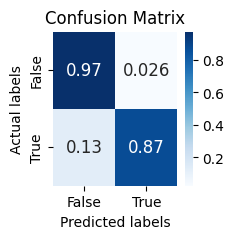

Precision: 0.9879089894035304
Recall: 0.8732828180027113


In [46]:
# Model evaluation on test set

# clus_df is one we will use
clus_df = pd.read_pickle('VarClusHi_ML_df_joined_LR_feats.pkl')
X = clus_df.drop(["IS_ARTIFACT"], axis=1) # drop labels
y = clus_df["IS_ARTIFACT"].copy() # labels

cat_attribs = ['REF','ALT'] 
X_train_num = X.drop(cat_attribs, axis=1) 
num_attribs = list(X_train_num)
all_features = num_attribs + cat_attribs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

final_model = RandomForestClassifier(random_state=42,
                                     n_jobs=16,
                                     class_weight='balanced',
                                     max_features=None, 
                                     n_estimators=2)


#final_model = grid_search.best_estimator_

num_pipeline =  Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # fill in missing values with median values
        ('std_scaler', StandardScaler()),              # feature scaling
        ])
    
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ])

#X_test = X_test.drop(["IS_ARTIFACT"], axis=1) # drop labels
#y_test = X_test["IS_ARTIFACT"].copy() # labels

#X_train = X_train.drop(["IS_ARTIFACT"], axis=1) # drop labels
#y_train = X_train["IS_ARTIFACT"].copy() # labels


X_trained_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

final_model.fit(X_trained_prepared, y_train)

final_predictions = final_model.predict(X_test_prepared)
y_pred = final_predictions

print("Model Performance on the datasets that were not trained on.")

print("3-fold Cross-Validation...")
scores = cross_val_score(final_model, X_test_prepared, y_test, scoring="accuracy", cv=3)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

labels = ['NON_ARTIFACT', 'IS_ARTIFACT']
cm = confusion_matrix(y_test, y_pred)
sum_of_rows = cm.sum(axis=1)
normalized_cm = cm / sum_of_rows[:, np.newaxis]

df_cm = pd.DataFrame(normalized_cm, index = ['False', 'True'],
                     columns = ['False', 'True'])
plt.figure(figsize = (2,2))
ax=plt.subplot()
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, ax=ax, cmap='Blues')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

true_positives = cm[1, 1]
predicted_positives = cm[1,1] + cm[0, 1]
actual_positives = cm[1,0] + cm[1, 1]
print("Precision:", true_positives / predicted_positives)
print("Recall:", true_positives / actual_positives)

3-fold Cross-Validation...
Scores: [0.87417764 0.87903692 0.87842769]
Mean: 0.8772140860694962
Standard deviation: 0.002161448071604287
Validating using train/test split


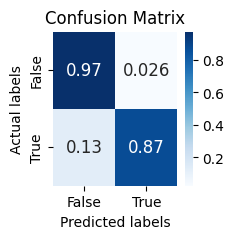

Test Metrics
Precision: 0.987911075575332
Recall: 0.8731215171497371
Accuracy: 0.9023625009199769


In [29]:
# Random Forest Classifier
final_model = RandomForestClassifier(random_state=42,
                                     n_jobs=16,
                                     class_weight='balanced',
                                     max_features=None, 
                                     n_estimators=2)

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the Random Forest model
rf_cls = final_model
#X_train, X_test, y_train, y_test = preprocess_dataframe(df_no_vcf_feats)
train_and_evaluate_model(rf_cls, X_train, X_test, y_train, y_test)

In [ ]:
# Random Forest Classifier
final_model = RandomForestClassifier(random_state=42,
                                     n_jobs=16,
                                     class_weight='balanced',
                                     max_features=None, 
                                     n_estimators=2)

#df = pd.read_pickle('ML_df_joined_LR_feats.pkl')
# Train and evaluate the Random Forest model
rf_cls = final_model
#X_train, X_test, y_train, y_test = preprocess_dataframe(df_no_vcf_feats)
train_and_evaluate_model(rf_cls, X_trained_prepared, X_test_prepared, y_train, y_test)

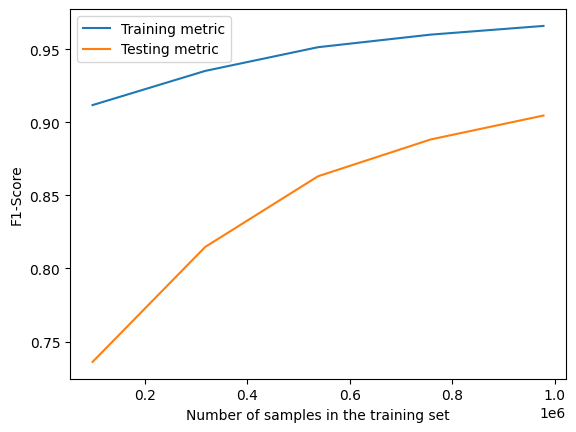

In [49]:
# F1 learning curve

f1_lc = LearningCurveDisplay.from_estimator(final_model, X_trained_prepared, y_train, scoring="f1", cv=3,
                                                  train_sizes=np.linspace(0.1, 1.0, 5),
                                                  shuffle=True, random_state=42, 
                                                  score_type="both", n_jobs=4, score_name="F1-Score", std_display_style=None)

plt.show()

# CASE 3

In [ ]:
# for srr_name, case3_idx in zip(srr_names, case3_idxs):
#     chroms = []
#     starts = []
#     stops = []
#     for chrom,pos in case3_idx:
#         # lseq
#         chroms.append(chrom)
#         starts.append(int(pos)-21)
#         stops.append(int(pos)-1)
#         # rseq
#         chroms.append(chrom)
#         starts.append(int(pos))
#         stops.append(int(pos)+20)
#     flank_regions_df = pd.DataFrame({'CHROM':chroms,
#                              'START':starts,
#                              'END':stops}) # start is non-inclusive, stop is inclusive in bed files
#     file_path = f'results/outputs/case3/{srr_name}_case3_flanking_regions.bed'
#     flank_regions_df.to_csv(file_path, sep='\t', index=False, header=False)

In [ ]:
# read in SRR_case3_flanking_seqs.fa -- these are nucleotide sequences

# for srr_name in srr_names:
#     file_path = f'results/outputs/case3/{srr_name}_case3_flanking_regions.bed'
#     print(srr_name)

In [ ]:
# read in agilentSureSelectv5_seqs.fa -- these are nucleotide sequences for this exome region

# file = 'agilentSureSelectv5_seqs.fa'

# seq_list = []

# with open(file, 'r') as f:
#     for line in f:
#         if not line.startswith('>'):
#             seq_list.append(line.strip('\n'))
            
# exome_seq = ''.join(seq_list)